<a href="https://colab.research.google.com/github/sam-shervin/Chinese-MNIST-dataset/blob/main/Chinese_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import cv2
import numpy as np
import csv



In [ ]:
value_mapping = {}
csv_file = '/content/drive/MyDrive/archive/chinese_mnist.csv'
column_name = 'value'
with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        value = row[column_name]
        if value not in value_mapping:
            value_mapping[value] = len(value_mapping) + 1
print(value_mapping)

directory = "/content/drive/MyDrive/archive/data/data"

num_digits = 15
one_hot_list = []
for digit in range(1, num_digits+1):
    one_hot = np.eye(num_digits)[digit-1]
    one_hot_list.append(one_hot)
for digit, one_hot in enumerate(one_hot_list, start=1):
    print(f"Digit {digit}: {one_hot}")

def get_next_column(csv_file, values):
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if row[:3] == values:
                if len(row) >= 4:
                    return row[3]
                else:
                    return None
    return None


def extract_numbers_from_string(string):
    parts = string[:-4].split('_')
    numbers = [str(part) for part in parts[1:4]]
    return numbers

{'9': 1, '10': 2, '100': 3, '1000': 4, '10000': 5, '100000000': 6, '0': 7, '1': 8, '2': 9, '3': 10, '4': 11, '5': 12, '6': 13, '7': 14, '8': 15}
Digit 1: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit 2: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit 3: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit 4: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit 5: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit 6: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit 7: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit 8: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit 9: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit 10: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit 11: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit 12: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit 13: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit 14: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit 15: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(15, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
image_arr = []
expected_output_array = []

i=0
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        image = np.array(img)
        image = np.mean(image, axis=2)
        image_arr.append(image)
        expected_output_array.append(one_hot_list[value_mapping[get_next_column(csv_file, extract_numbers_from_string(filename))]-1])
        i+=1
        if (i%500==0):
          print(i)



image_arr = np.array(image_arr).reshape(len(image_arr), 64, 64, 1)
expected_output_array = np.array(expected_output_array)



500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000


In [ ]:
model.fit(image_arr[:-5000, :, :, :], expected_output_array[:-5000, :], epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(image_arr[-5000:, :, :, :], expected_output_array[-5000:, :])
print("loss: ,", loss,"\n accuracy: ", accuracy)
# Make predictions
predictions = model.predict(image_arr[-5000:, :, :, :])

print(predictions)

Epoch 1/10
313/313 [==============================] - 6s 6ms/step - loss: 0.7985 - accuracy: 0.7536
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 0.1856 - accuracy: 0.9414
Epoch 3/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0974 - accuracy: 0.9698
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0752 - accuracy: 0.9786
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0754 - accuracy: 0.9763
Epoch 6/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0658 - accuracy: 0.9792
Epoch 7/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0424 - accuracy: 0.9876
Epoch 8/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0678 - accuracy: 0.9782
Epoch 9/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0312 - accuracy: 0.9911
Epoch 10/10
157/157 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.9446

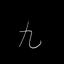

1 1


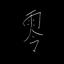

7 7


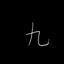

1 1


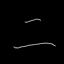

10 9


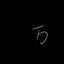

5 5


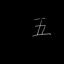

12 12


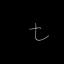

14 14


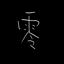

7 7


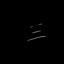

10 10


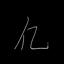

6 6


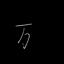

5 5


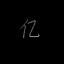

6 6


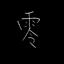

7 7


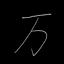

5 5


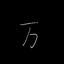

5 5


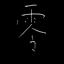

7 7


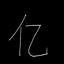

6 6


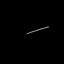

8 8


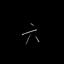

13 13


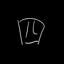

11 11


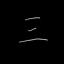

10 10


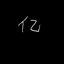

6 6


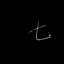

14 14


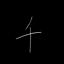

4 4


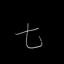

14 14


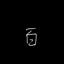

3 3


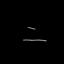

9 9


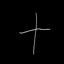

2 2


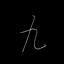

1 1


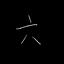

13 13


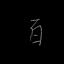

3 3


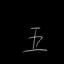

12 12


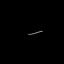

8 8


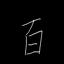

3 3


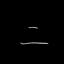

9 9


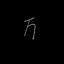

5 5


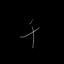

4 4


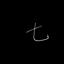

14 14


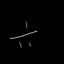

13 13


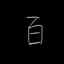

3 3


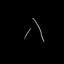

15 15


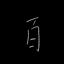

3 3


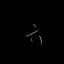

13 13


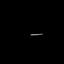

8 8


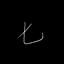

14 14


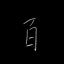

3 3


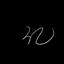

6 6


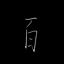

3 3


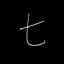

14 14


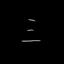

10 10


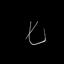

14 14


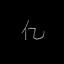

6 6


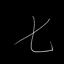

14 14


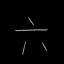

13 13


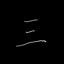

10 10


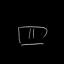

11 11


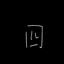

11 11


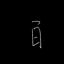

3 3


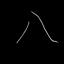

15 15


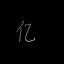

6 6


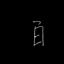

3 3


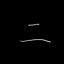

9 9


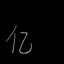

3 6


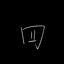

11 11


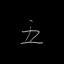

12 12


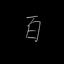

3 3


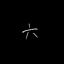

13 13


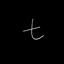

14 14


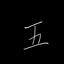

12 12


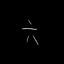

13 13


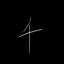

4 4


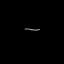

8 8


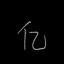

6 6


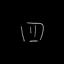

11 11


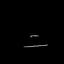

9 9


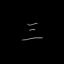

10 10


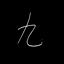

1 1


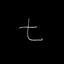

14 14


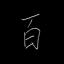

3 3


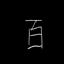

3 3


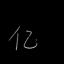

6 6


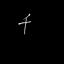

4 4


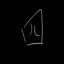

11 11


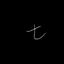

14 14


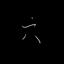

13 13


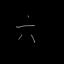

13 13


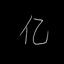

6 6


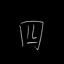

11 11


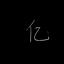

6 6


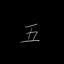

12 12


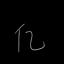

6 6


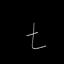

14 14


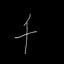

4 4


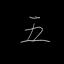

12 12


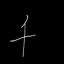

4 4


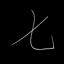

14 14


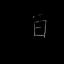

3 3


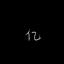

6 6


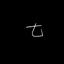

14 14


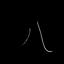

15 15


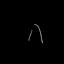

15 15


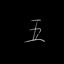

12 12


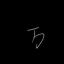

5 5


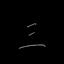

10 10


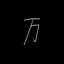

5 5


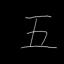

12 12


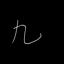

14 1


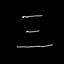

10 10


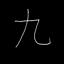

1 1


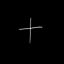

2 2


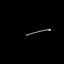

8 8


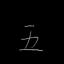

12 12


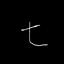

14 14


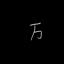

5 5


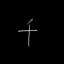

4 4


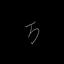

5 5


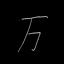

5 5


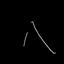

15 15


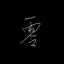

7 7


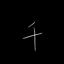

4 4


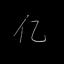

6 6


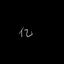

6 6


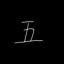

12 12


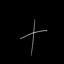

2 2


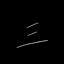

10 10


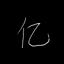

6 6


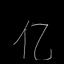

6 6


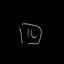

11 11


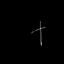

2 2


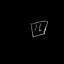

11 11


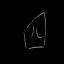

11 11


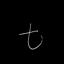

14 14


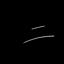

9 9


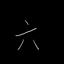

13 13


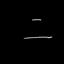

9 9


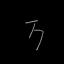

5 5


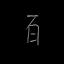

3 3


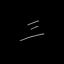

10 10


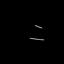

9 9


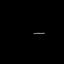

8 8


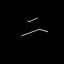

9 9


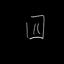

11 11


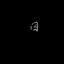

3 11


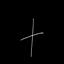

2 2


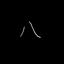

15 15


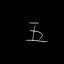

12 12


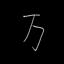

5 5


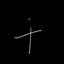

4 4


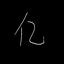

6 6


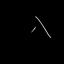

15 15


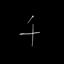

4 4


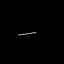

8 8


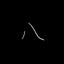

15 15


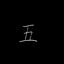

12 12


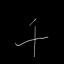

4 4


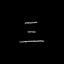

10 10


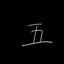

12 12


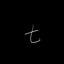

14 14


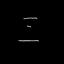

10 10


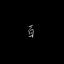

3 3


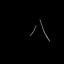

15 15


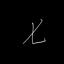

14 14


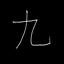

1 1


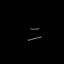

9 9


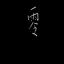

7 7


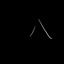

15 15


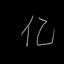

6 6


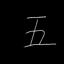

12 12


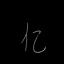

1 6


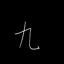

1 1


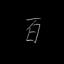

3 3


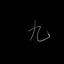

1 1


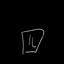

11 11


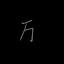

5 5


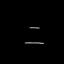

9 9


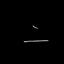

9 9


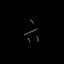

13 13


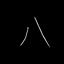

15 15


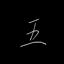

12 12


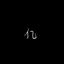

6 6


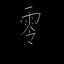

7 7


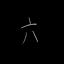

13 13


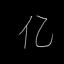

6 6


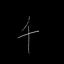

4 4


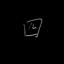

11 11


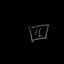

11 11


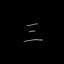

10 10


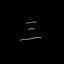

10 10


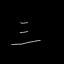

10 10


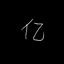

6 6


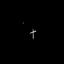

2 2


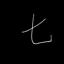

14 14


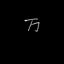

5 5


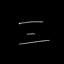

10 10


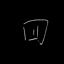

11 11


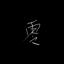

7 7


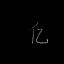

14 6


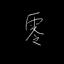

7 7


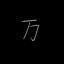

5 5


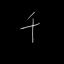

4 4


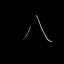

15 15


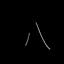

15 15


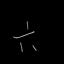

13 13


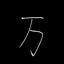

5 5


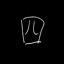

11 11


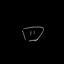

11 11


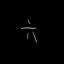

13 13


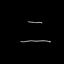

9 9


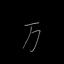

5 5


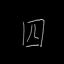

11 11


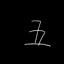

12 12


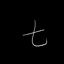

14 14


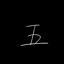

12 12


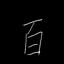

3 3


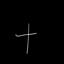

2 2


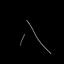

15 15


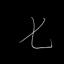

14 14


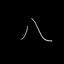

15 15


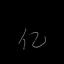

6 6


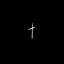

2 2


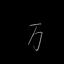

5 5


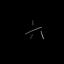

13 13


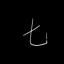

14 14


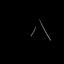

15 15


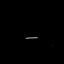

8 8


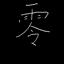

7 7


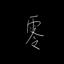

7 7


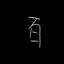

3 3


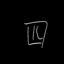

11 11


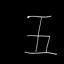

12 12


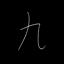

1 1


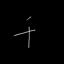

4 4


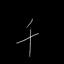

4 4


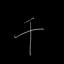

4 4


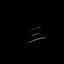

10 10


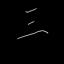

10 10


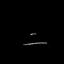

9 9


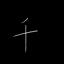

4 4


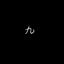

1 1


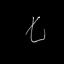

1 14


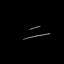

9 9


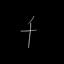

4 4


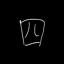

11 11


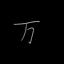

5 5


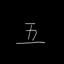

12 12


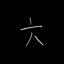

13 13


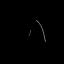

15 15


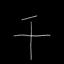

4 4


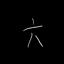

13 13


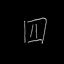

11 11


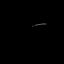

8 8


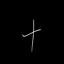

2 2


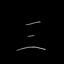

10 10


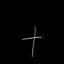

2 2


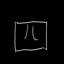

11 11


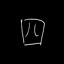

11 11


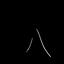

15 15


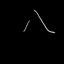

15 15


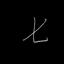

14 14


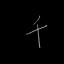

4 4


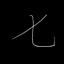

7 14


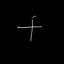

2 4


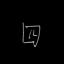

11 11


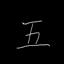

12 12


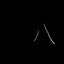

15 15


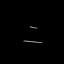

9 9


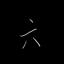

13 13


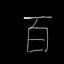

3 3


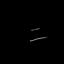

9 9


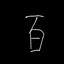

3 3


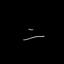

9 9


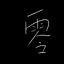

7 7


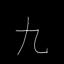

1 1


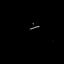

9 9


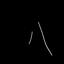

15 15


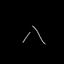

15 15


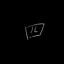

11 11


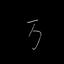

5 5


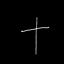

2 2


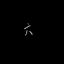

13 13


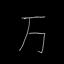

5 5


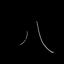

15 15


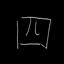

11 11


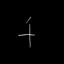

4 4


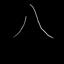

15 15


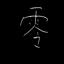

7 7


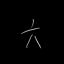

13 13


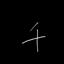

4 4


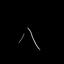

15 15


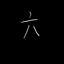

13 13


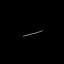

8 8


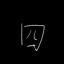

11 11


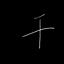

4 4


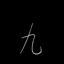

1 1


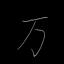

5 5


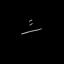

9 10


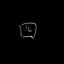

11 11


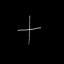

2 2


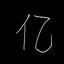

6 6


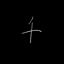

4 4


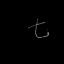

14 14


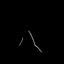

15 15


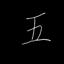

12 12


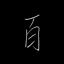

3 3


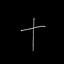

2 2


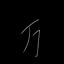

5 5


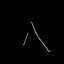

15 15


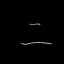

9 9


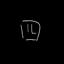

11 11


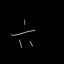

13 13


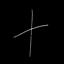

2 2


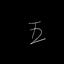

12 12


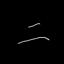

9 9


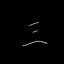

10 10


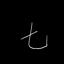

14 14


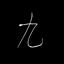

1 1


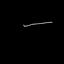

8 8


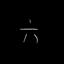

13 13


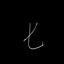

14 14


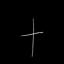

2 2


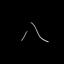

15 15


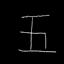

12 12


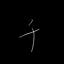

4 4


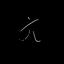

13 13


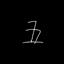

12 12


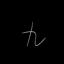

1 1


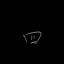

11 11


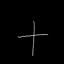

2 2


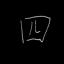

11 11


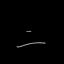

9 9


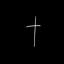

2 2


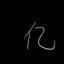

6 6


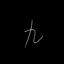

1 1


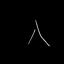

15 15


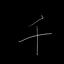

4 4


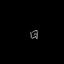

11 11


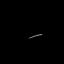

8 8


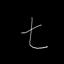

14 14


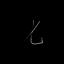

14 14


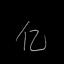

6 6


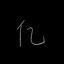

6 6


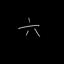

13 13


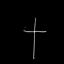

2 2


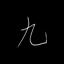

1 1


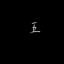

12 12


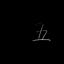

14 12


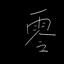

7 7


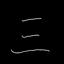

10 10


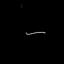

8 8


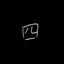

11 11


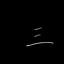

9 10


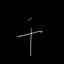

4 4


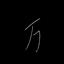

5 5


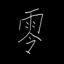

7 7


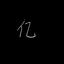

6 6


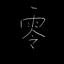

7 7


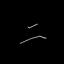

9 9


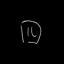

11 11


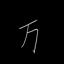

5 5


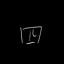

11 11


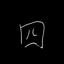

11 11


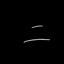

9 9


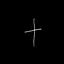

2 2


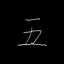

12 12


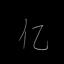

6 6


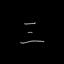

10 10


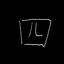

11 11


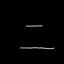

9 9


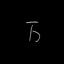

5 5


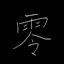

7 7


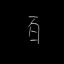

3 3


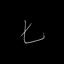

14 14


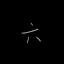

13 13


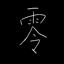

7 7


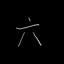

13 13


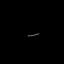

8 8


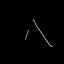

15 15


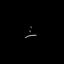

10 10


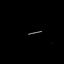

8 8


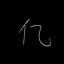

6 6


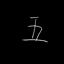

12 12


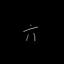

13 13


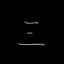

10 10


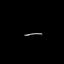

8 8


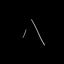

15 15


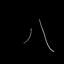

15 15


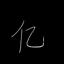

6 6


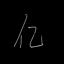

6 6


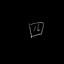

11 11


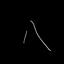

15 15


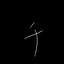

4 4


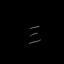

10 10


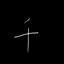

4 4


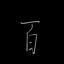

3 3


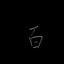

3 3


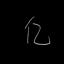

6 6


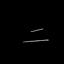

9 9


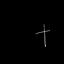

15 2


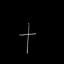

2 2


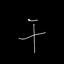

4 4


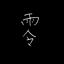

7 7


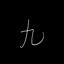

1 1


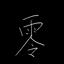

7 7


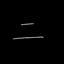

9 9


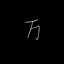

5 5


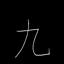

1 1


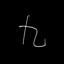

1 1


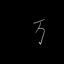

5 5


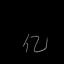

6 6


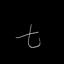

14 14


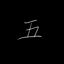

12 12


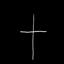

2 2


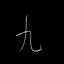

1 1


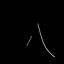

15 15


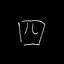

11 11


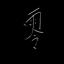

7 7


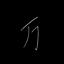

5 5


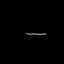

8 8


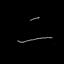

9 9


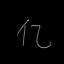

6 6


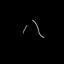

15 15


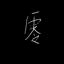

7 7


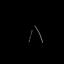

15 15


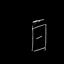

3 3


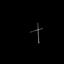

2 2


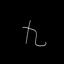

1 1


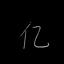

6 6


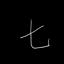

14 14


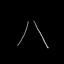

15 15


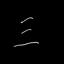

10 10


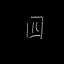

11 11


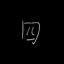

11 11


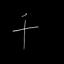

4 4


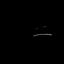

9 9


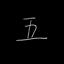

12 12


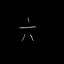

13 13


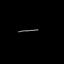

8 8


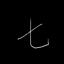

14 14


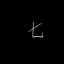

14 14


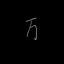

5 5


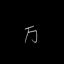

5 5


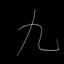

1 1


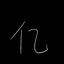

6 6


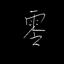

7 7


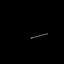

8 8


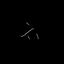

13 13


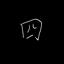

11 11


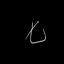

14 14


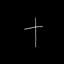

2 2


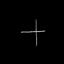

2 2


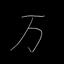

5 5


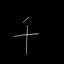

4 4


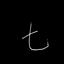

14 14


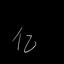

6 6


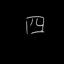

11 11


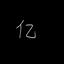

6 6


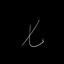

14 14


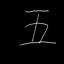

12 12


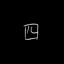

11 11


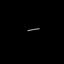

8 8


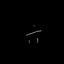

13 13


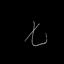

14 14


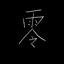

7 7


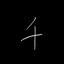

4 4


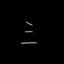

10 10


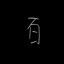

3 3


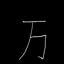

5 5


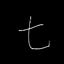

14 14


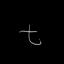

14 14


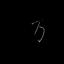

5 5


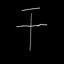

3 4


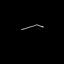

8 8


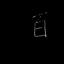

3 3


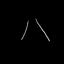

15 15


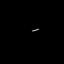

8 8


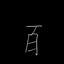

3 3


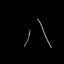

15 15


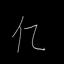

6 6


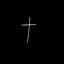

2 2


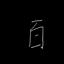

3 3


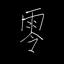

7 7


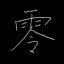

7 7


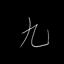

1 1


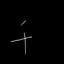

4 4


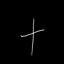

2 2


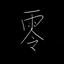

7 7


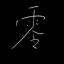

7 7


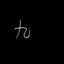

6 1


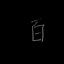

3 3


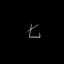

14 14


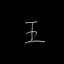

12 12


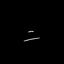

9 9


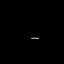

8 8


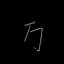

5 5


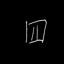

11 11


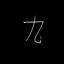

1 1


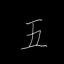

12 12


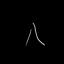

15 15


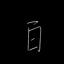

3 3


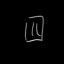

11 11


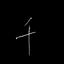

4 4


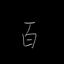

3 3


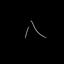

15 15


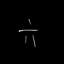

13 13


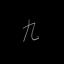

1 1


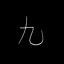

1 1


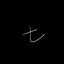

14 14


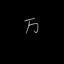

5 5


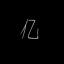

6 6


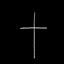

2 2


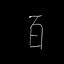

3 3


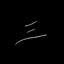

10 10


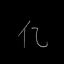

6 6


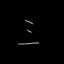

10 10


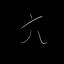

13 13


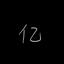

6 6


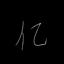

6 6


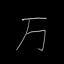

5 5


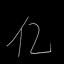

6 6


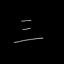

10 10


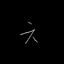

13 13


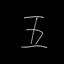

12 12


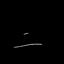

9 9


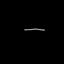

8 8


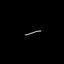

8 8


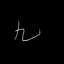

1 1


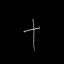

2 2


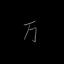

5 5


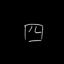

11 11


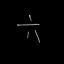

13 13


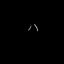

15 15


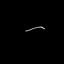

8 8


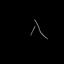

15 15


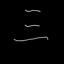

10 10


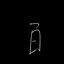

3 3


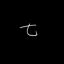

14 14


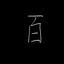

3 3


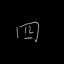

11 11


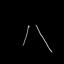

15 15


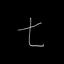

14 14


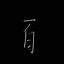

3 3


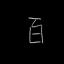

3 3


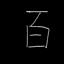

3 3


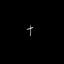

2 2


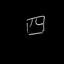

11 11


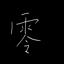

7 7


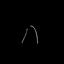

15 15


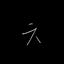

13 13


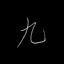

1 1


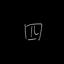

11 11


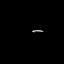

8 8


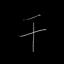

4 4


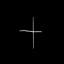

2 2


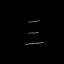

10 10


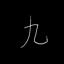

1 1


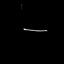

8 8


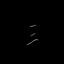

10 10


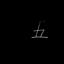

12 12


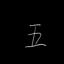

12 12


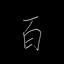

3 3


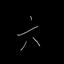

13 13


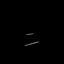

9 9


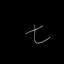

14 14


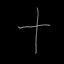

2 2


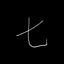

14 14


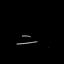

9 9


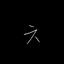

13 13


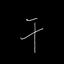

4 4


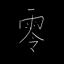

7 7


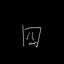

11 11


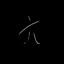

13 13


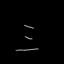

10 10


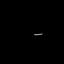

8 8


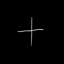

2 2


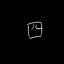

11 11


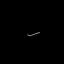

8 8


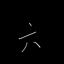

13 13


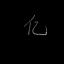

6 6


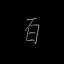

3 3


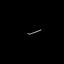

8 8


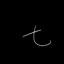

14 14


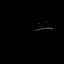

8 9


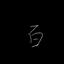

3 3


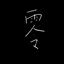

7 7


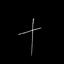

2 2


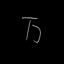

5 5


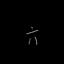

13 13


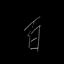

3 3


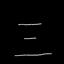

10 10


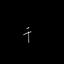

4 4


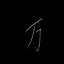

5 5


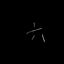

13 13


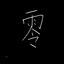

7 7


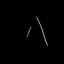

15 15


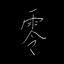

7 7


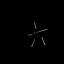

13 13


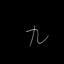

1 1


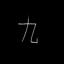

1 1


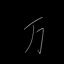

5 5


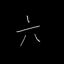

13 13


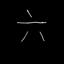

13 13


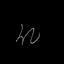

6 6


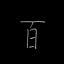

3 3


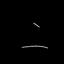

9 9


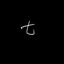

14 14


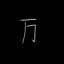

5 5


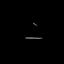

9 9


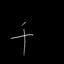

4 4


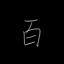

3 3


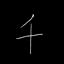

4 4


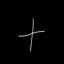

2 2


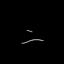

9 9


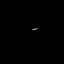

8 8


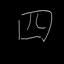

11 11


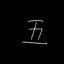

12 12


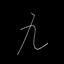

1 1


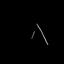

15 15


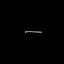

8 8


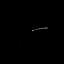

8 8


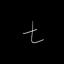

14 14


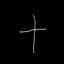

2 2


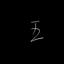

12 12


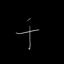

4 4


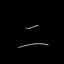

9 9


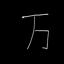

5 5


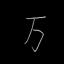

5 5


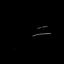

9 9


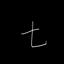

14 14


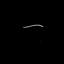

8 8


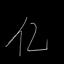

6 6


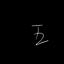

12 12


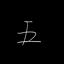

12 12


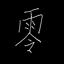

7 7


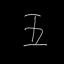

12 12


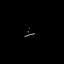

14 10


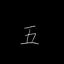

12 12


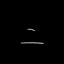

9 9


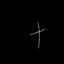

2 2


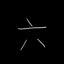

13 13


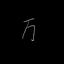

5 5


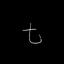

14 14


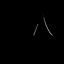

15 15


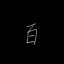

3 3


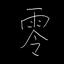

7 7


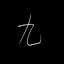

1 1


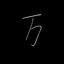

5 5


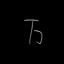

5 5


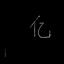

1 6


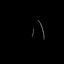

15 15


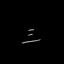

10 10


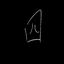

3 11


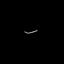

8 8


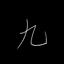

1 1


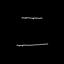

10 9


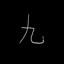

1 1


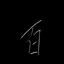

3 3


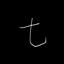

14 14


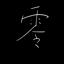

7 7


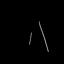

15 15


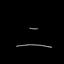

9 9


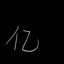

6 6


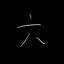

13 13


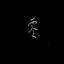

7 7


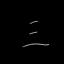

10 10


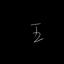

12 12


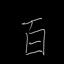

3 3


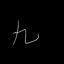

1 1


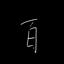

3 3


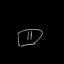

11 11


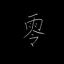

7 7


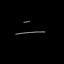

9 9


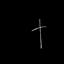

4 2


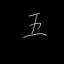

12 12


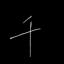

4 4


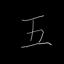

12 12


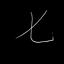

7 14


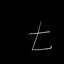

14 14


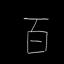

3 3


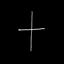

2 2


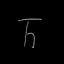

5 5


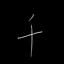

4 4


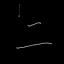

9 9


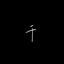

4 4


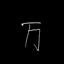

5 5


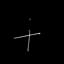

4 4


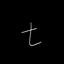

14 14


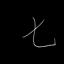

14 14


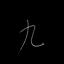

1 1


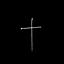

2 2


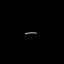

8 8


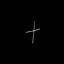

2 2


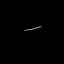

8 8


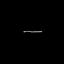

8 8


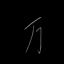

5 5


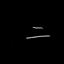

9 9


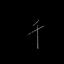

4 4


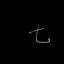

14 14


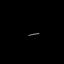

8 8


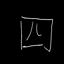

11 11


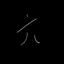

13 13


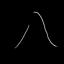

15 15


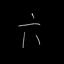

13 13


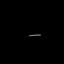

8 8


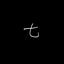

14 14


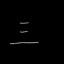

10 10


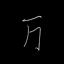

5 5


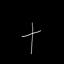

2 2


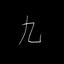

1 1


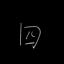

11 11


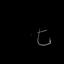

14 14


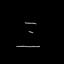

10 10


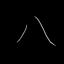

15 15


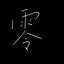

7 7


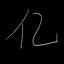

6 6


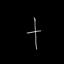

2 2


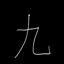

1 1


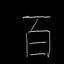

3 3


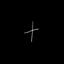

2 2


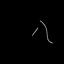

14 15


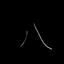

15 15


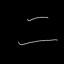

9 9


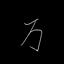

5 5


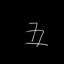

12 12


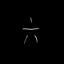

13 13


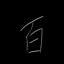

3 3


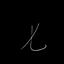

14 14


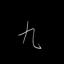

1 1


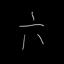

13 13


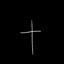

2 2


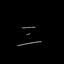

10 10


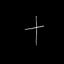

2 2


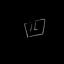

11 11


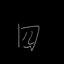

11 11


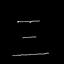

10 10


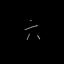

13 13


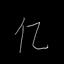

6 6


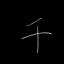

4 4


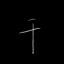

4 4


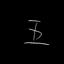

12 12


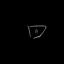

11 11


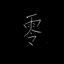

7 7


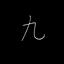

1 1


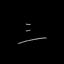

10 10


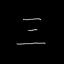

10 10


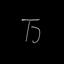

5 5


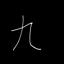

1 1


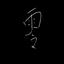

7 7


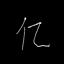

6 6


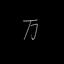

5 5


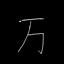

5 5


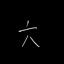

13 13


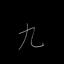

1 1


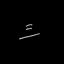

9 10


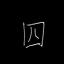

11 11


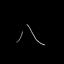

15 15


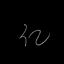

6 6


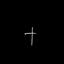

2 2


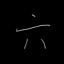

13 13


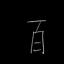

3 3


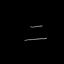

9 9


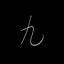

1 1


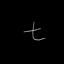

14 14


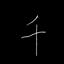

4 4


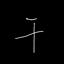

4 4


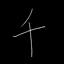

4 4


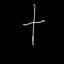

2 2


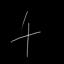

4 4


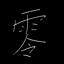

7 7


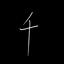

4 4


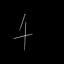

6 4


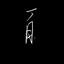

3 3


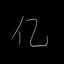

6 6


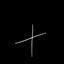

2 2


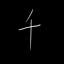

4 4


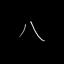

15 15


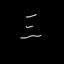

10 10


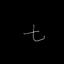

14 14


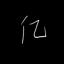

6 6


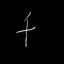

4 4


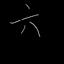

13 13


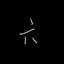

13 13


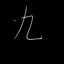

1 1


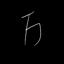

5 5


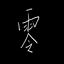

7 7


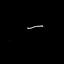

8 8


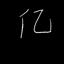

11 6


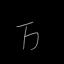

5 5


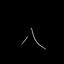

15 15


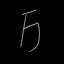

5 5


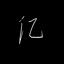

6 6


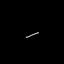

8 8


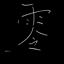

7 7


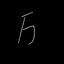

5 5


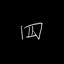

11 11


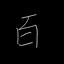

3 3


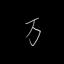

5 5


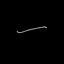

8 8


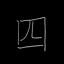

11 11


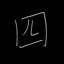

11 11


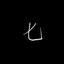

14 14


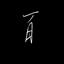

3 3


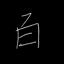

3 3


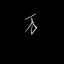

1 5


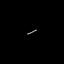

8 8


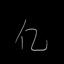

6 6


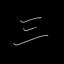

10 10


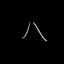

15 15


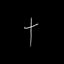

2 2


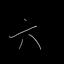

13 13


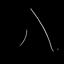

15 15


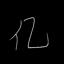

14 6


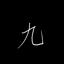

1 1


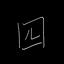

11 11


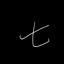

14 14


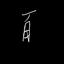

3 3


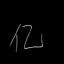

6 6


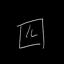

11 11


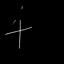

13 4


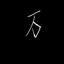

7 5


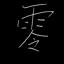

7 7


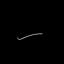

8 8


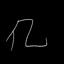

6 6


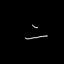

9 9


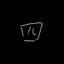

11 11


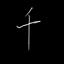

4 4


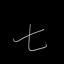

14 14


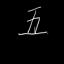

12 12


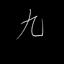

1 1


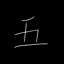

12 12


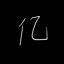

6 6


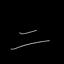

9 9


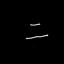

9 9


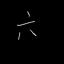

13 13


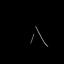

15 15


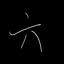

13 13


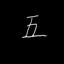

12 12


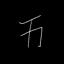

5 5


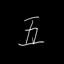

12 12


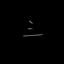

10 10


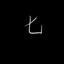

14 14


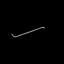

8 8


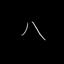

15 15


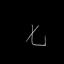

14 14


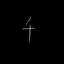

4 4


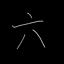

13 13


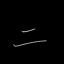

9 9


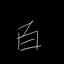

3 3


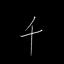

4 4


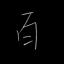

3 3


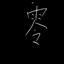

7 7


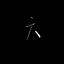

13 13


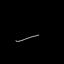

8 8


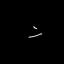

9 9


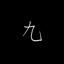

1 1


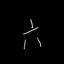

13 13


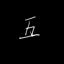

12 12


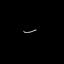

8 8


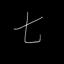

14 14


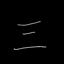

10 10


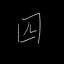

3 11


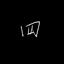

11 11


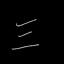

10 10


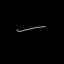

8 8


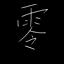

7 7


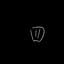

11 11


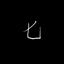

14 14


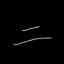

9 9


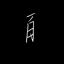

3 3


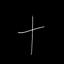

2 2


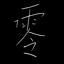

7 7


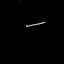

8 8


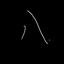

15 15


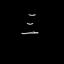

10 10


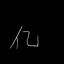

6 6


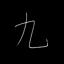

1 1


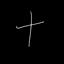

2 2


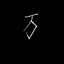

7 5


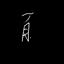

6 3


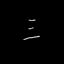

10 10


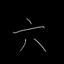

13 13


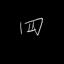

11 11


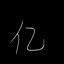

6 6


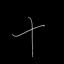

2 2


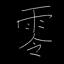

7 7


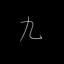

1 1


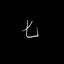

14 14


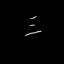

10 10


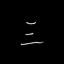

10 10


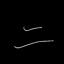

9 9


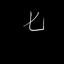

14 14


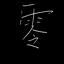

7 7


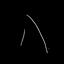

15 15


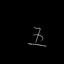

12 12


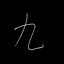

1 1


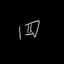

11 11


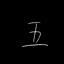

12 12


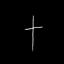

2 2


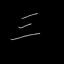

10 10


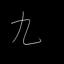

6 1


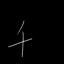

14 4


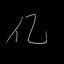

6 6


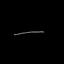

8 8


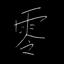

7 7


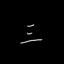

10 10


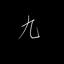

1 1


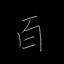

3 3


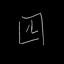

11 11


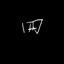

11 11


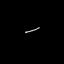

8 8


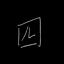

11 11


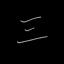

10 10


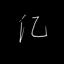

6 6


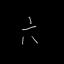

13 13


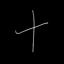

2 2


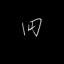

11 11


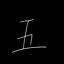

12 12


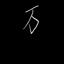

7 5


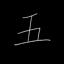

12 12


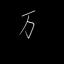

6 5


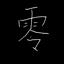

7 7


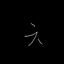

13 13


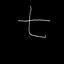

14 14


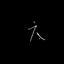

13 13


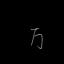

5 5


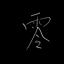

7 7


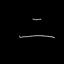

9 9


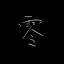

7 7


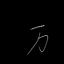

5 5


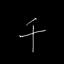

4 4


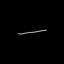

8 8


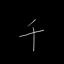

4 4


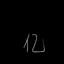

6 6


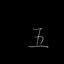

12 12


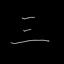

10 10


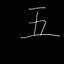

12 12


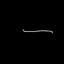

8 8


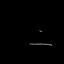

9 9


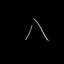

15 15


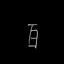

3 3


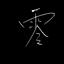

7 7


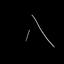

15 15


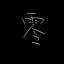

7 7


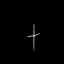

2 2


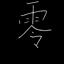

7 7


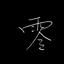

7 7


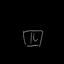

11 11


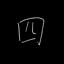

11 11


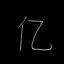

6 6


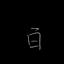

3 3


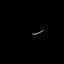

8 8


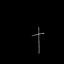

2 2


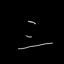

10 10


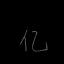

6 6


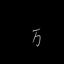

5 5


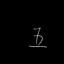

12 12


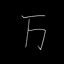

5 5


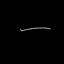

8 8


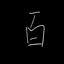

3 3


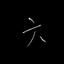

13 13


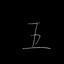

12 12


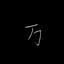

5 5


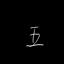

12 12


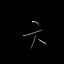

13 13


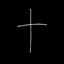

2 2


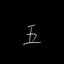

12 12


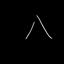

15 15


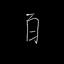

3 3


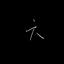

13 13


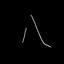

15 15


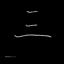

10 10


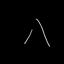

15 15


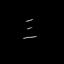

10 10


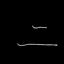

9 9


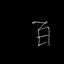

3 3


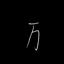

5 5


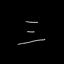

10 10


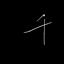

4 4


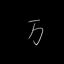

5 5


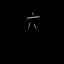

13 13


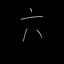

13 13


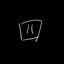

11 11


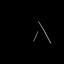

15 15


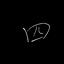

11 11


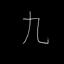

1 1


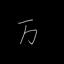

5 5


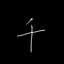

4 4


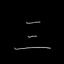

10 10


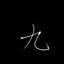

1 1


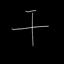

4 4


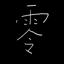

7 7


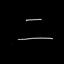

9 9


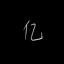

6 6


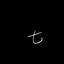

14 14


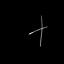

2 2


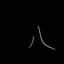

15 15


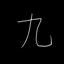

1 1


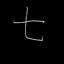

14 14


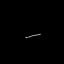

8 8


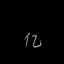

6 6


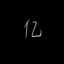

6 6


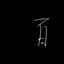

3 3


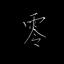

7 7


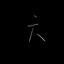

13 13


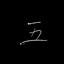

12 12


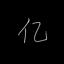

6 6


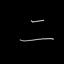

9 9


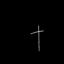

2 2


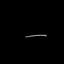

8 8


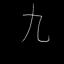

1 1


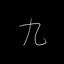

1 1


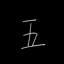

12 12


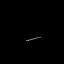

8 8


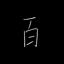

3 3


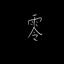

7 7
5 5


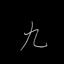

1 1


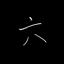

13 13


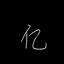

6 6


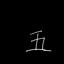

12 12


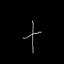

2 2


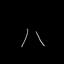

15 15


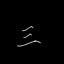

10 10


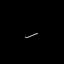

8 8


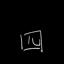

11 11


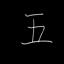

12 12


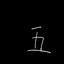

12 12


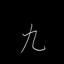

1 1


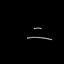

9 9


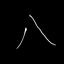

15 15


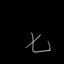

14 14


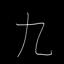

1 1


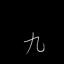

1 1


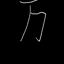

1 5


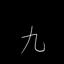

1 1


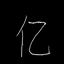

6 6


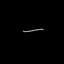

8 8


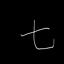

14 14


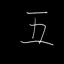

12 12


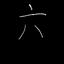

13 13


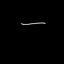

8 8


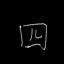

11 11


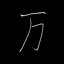

5 5


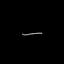

8 8


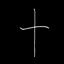

2 2


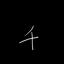

4 4


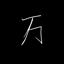

5 5


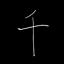

4 4


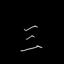

10 10


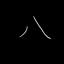

15 15


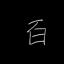

3 3


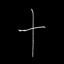

2 2


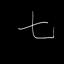

14 14


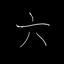

13 13


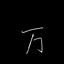

5 5


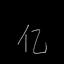

6 6


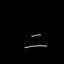

9 9


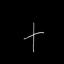

2 2


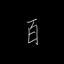

3 3


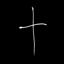

2 2


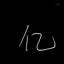

6 6


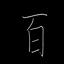

3 3


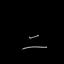

9 9


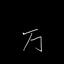

5 5


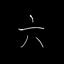

13 13


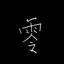

7 7


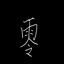

7 7


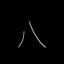

15 15


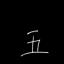

10 12


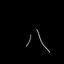

15 15


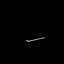

8 8


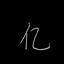

6 6


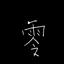

7 7


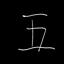

12 12


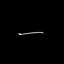

8 8


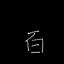

3 3


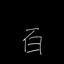

3 3


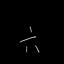

13 13


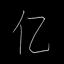

7 6


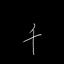

4 4


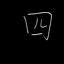

7 11


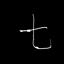

14 14


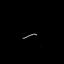

8 8


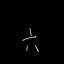

13 13


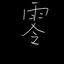

7 7


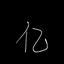

6 6


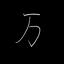

5 5


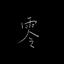

7 7


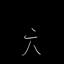

13 13


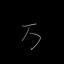

5 5


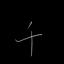

4 4


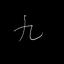

1 1


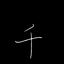

4 4


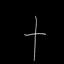

2 2


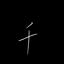

4 4


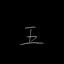

12 12


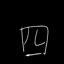

11 11


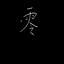

7 7


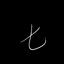

14 14


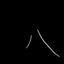

15 15


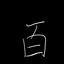

10 3


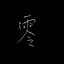

7 7


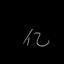

6 6


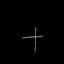

2 2


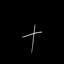

2 2


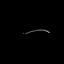

8 8


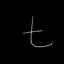

14 14


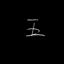

12 12


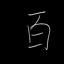

3 3


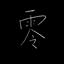

7 7


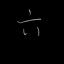

13 13


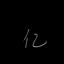

6 6


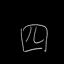

11 11


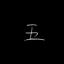

12 12


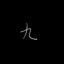

1 1


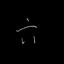

13 13


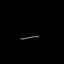

8 8


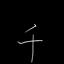

4 4


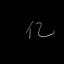

6 6


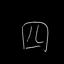

11 11


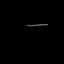

8 8


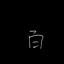

3 3


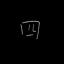

11 11


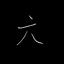

13 13


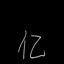

6 6


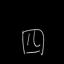

11 11


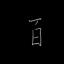

3 3


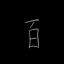

3 3


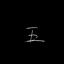

12 12


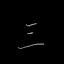

10 10


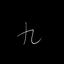

1 1


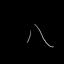

15 15


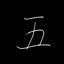

12 12


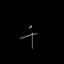

4 4


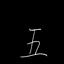

12 12


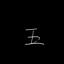

12 12


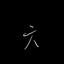

13 13


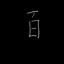

3 3


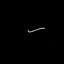

8 8


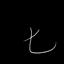

14 14


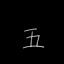

12 12


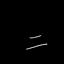

9 9


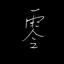

7 7


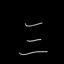

10 10


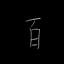

3 3


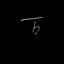

8 5


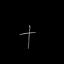

2 2


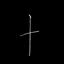

2 2


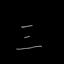

10 10


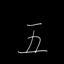

12 12


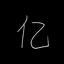

6 6


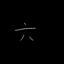

13 13


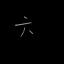

13 13


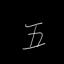

12 12


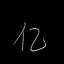

6 6


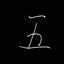

12 12


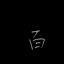

3 3


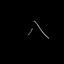

15 15


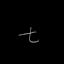

14 14


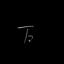

13 5


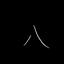

15 15


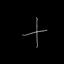

2 2


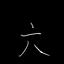

13 13


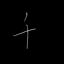

4 4


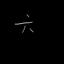

13 13


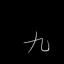

1 1


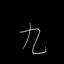

1 1


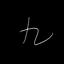

1 1


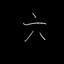

13 13


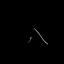

15 15


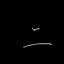

9 9


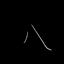

15 15


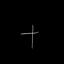

2 2


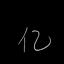

6 6


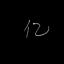

6 6


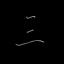

10 10


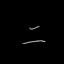

9 9


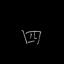

11 11


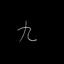

1 1


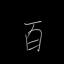

3 3


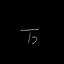

13 5


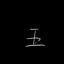

12 12


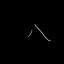

15 15


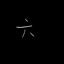

13 13


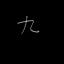

1 1


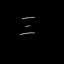

10 10


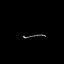

8 8


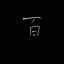

3 3


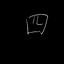

11 11


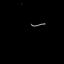

8 8


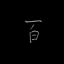

3 3


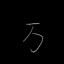

5 5


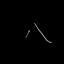

15 15


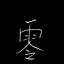

3 7


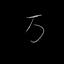

5 5


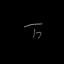

5 5


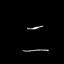

9 9


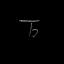

5 5


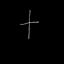

2 2


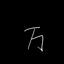

5 5


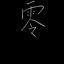

7 7


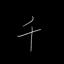

4 4


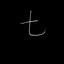

14 14


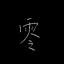

7 7


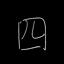

11 11


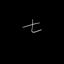

14 14


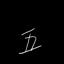

10 12


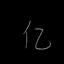

6 6


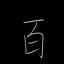

3 3


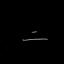

9 9


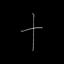

2 2


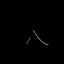

15 15


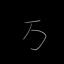

5 5


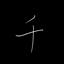

4 4


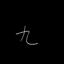

14 1


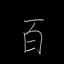

3 3


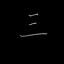

10 10


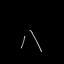

15 15


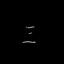

10 10


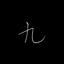

1 1


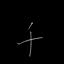

4 4


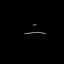

9 9


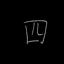

11 11


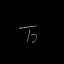

5 5


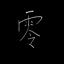

7 7


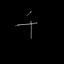

4 4


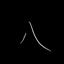

15 15


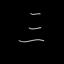

10 10


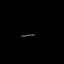

8 8


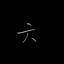

13 13


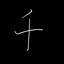

4 4


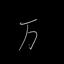

5 5


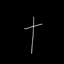

2 2


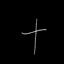

2 2


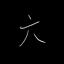

13 13


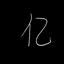

6 6


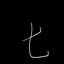

2 14


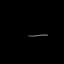

8 8


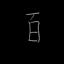

3 3


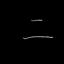

9 9


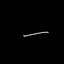

8 8


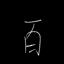

3 3


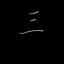

10 10


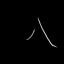

15 15


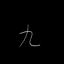

1 1


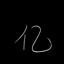

6 6


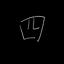

11 11


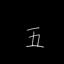

12 12


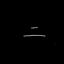

9 9


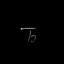

2 5


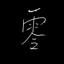

7 7


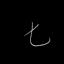

14 14


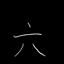

13 13


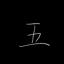

12 12


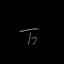

5 5


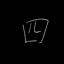

11 11


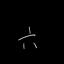

13 13


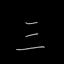

10 10


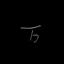

2 5


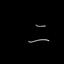

9 9


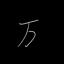

5 5


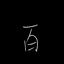

3 3


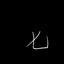

14 14


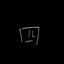

11 11


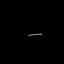

8 8


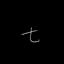

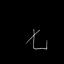

14 14


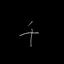

4 4


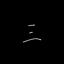

10 10


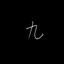

1 1


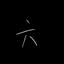

13 13


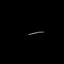

8 8


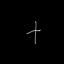

2 2


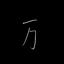

5 5


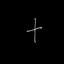

2 2


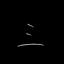

10 10


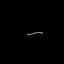

8 8


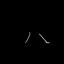

15 15


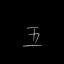

12 12


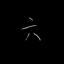

13 13


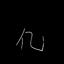

6 6


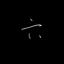

13 13


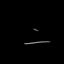

9 9


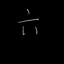

12 13


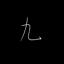

1 1


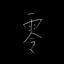

7 7


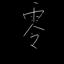

7 7


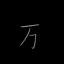

5 5


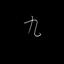

1 1


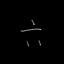

13 13


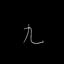

1 1


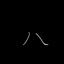

15 15


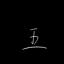

12 12


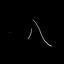

15 15


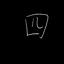

11 11


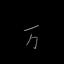

5 5


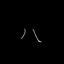

15 15


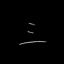

9 10


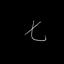

14 14


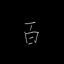

3 3


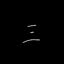

10 10


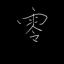

7 7


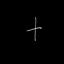

2 2


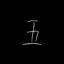

12 12


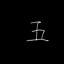

12 12


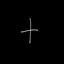

2 2


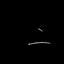

9 9


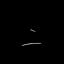

9 9


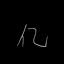

6 6


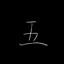

12 12


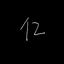

6 6


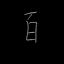

3 3


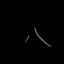

15 15


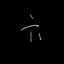

13 13


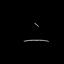

9 9


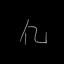

6 6


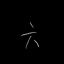

13 13


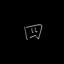

11 11


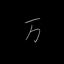

5 5


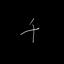

4 4


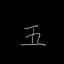

12 12


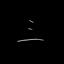

10 10


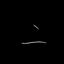

9 9


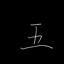

12 12


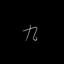

1 1


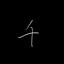

4 4


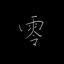

7 7


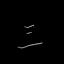

10 10


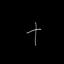

2 2


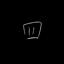

11 11


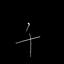

4 4


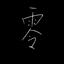

7 7


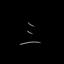

10 10


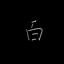

3 3


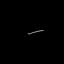

8 8


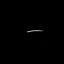

8 8


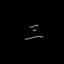

10 10


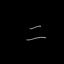

9 9


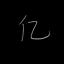

6 6


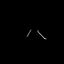

15 15


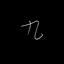

1 1


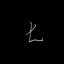

14 14


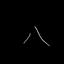

15 15


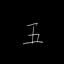

12 12


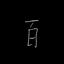

3 3


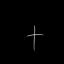

2 2


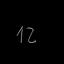

6 6


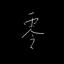

7 7


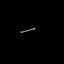

8 8


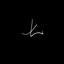

14 14


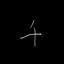

4 4


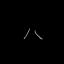

15 15


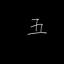

12 12


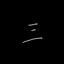

9 10


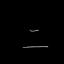

9 9


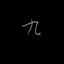

1 1


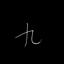

1 1


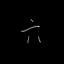

13 13


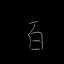

3 3


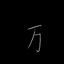

5 5


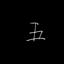

12 12


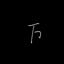

5 5


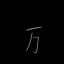

5 5


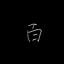

3 3


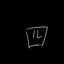

11 11


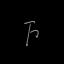

5 5


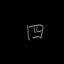

11 11


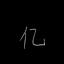

6 6


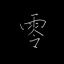

7 7


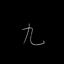

1 1


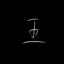

12 12


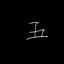

12 12


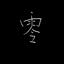

7 7


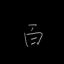

3 3


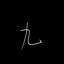

1 1


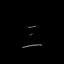

10 10


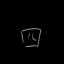

11 11


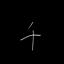

4 4


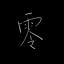

7 7


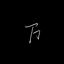

5 5


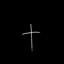

2 2


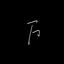

5 5


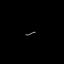

8 8


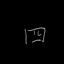

11 11


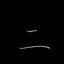

9 9


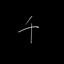

4 4


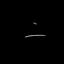

9 9


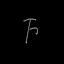

5 5


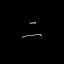

9 9


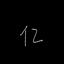

6 6


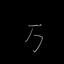

5 5


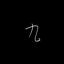

1 1


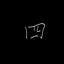

11 11


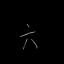

13 13


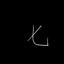

14 14


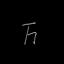

5 5


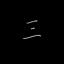

10 10


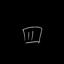

11 11


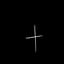

2 2


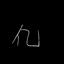

6 6


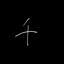

4 4


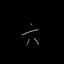

13 13


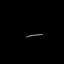

8 8


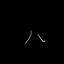

15 15


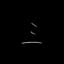

10 10


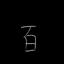

3 3


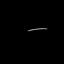

8 8


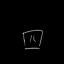

11 11


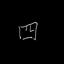

11 11


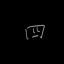

11 11


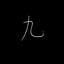

1 1


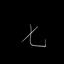

14 14


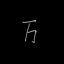

5 5


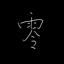

7 7


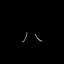

15 15


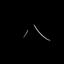

15 15


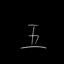

12 12


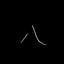

15 15


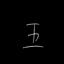

12 12


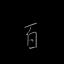

3 3


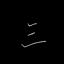

10 10


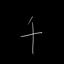

4 4


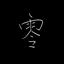

7 7


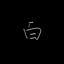

3 3


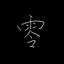

7 7


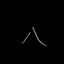

15 15


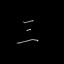

10 10


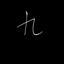

1 1


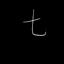

14 14


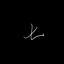

14 14


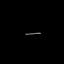

8 8


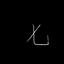

14 14


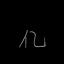

1 6


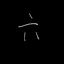

13 13


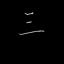

10 10


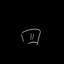

11 11


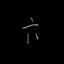

13 13


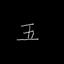

12 12


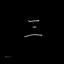

10 10


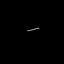

8 8


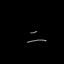

9 9


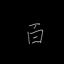

3 3


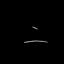

9 9


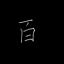

3 3


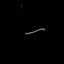

8 8


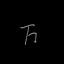

5 5


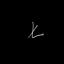

14 14


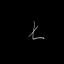

14 14


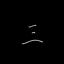

10 10


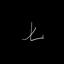

14 14


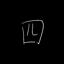

11 11


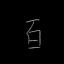

3 3


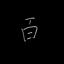

3 3


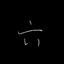

13 13


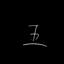

12 12


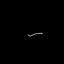

8 8


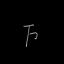

5 5


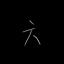

13 13


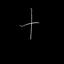

2 2


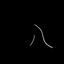

15 15


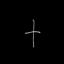

2 2


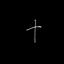

2 2


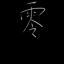

7 7


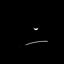

9 9


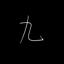

1 1


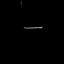

8 8


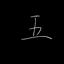

12 12


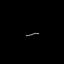

8 8


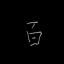

3 3


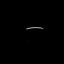

8 8


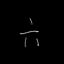

13 13


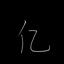

6 6


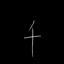

4 4


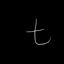

14 14


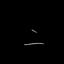

9 9


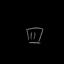

11 11


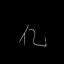

6 6


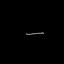

8 8


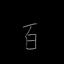

3 3


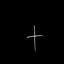

2 2


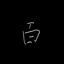

3 3


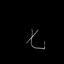

14 14


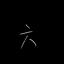

13 13


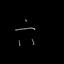

13 13


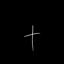

2 2


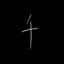

4 4


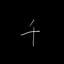

4 4


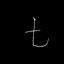

14 14


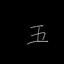

12 12


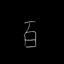

3 3


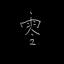

7 7


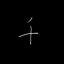

4 4


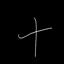

2 2


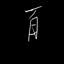

3 3


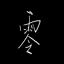

7 7


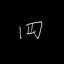

11 11


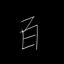

3 3


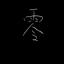

7 7


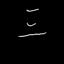

10 10


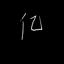

6 6


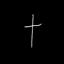

2 2


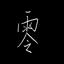

7 7


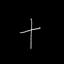

2 2


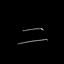

9 9


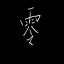

7 7


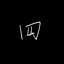

11 11


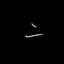

9 9


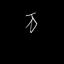

7 5


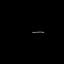

8 8


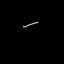

8 8


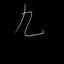

6 1


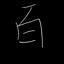

3 3


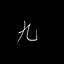

1 1


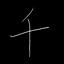

4 4


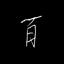

3 3


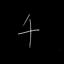

4 4


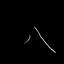

15 15


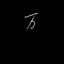

7 5


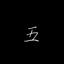

12 12


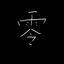

7 7


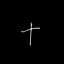

2 2


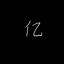

6 6


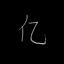

6 6


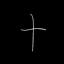

2 2


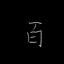

3 3


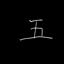

12 12


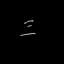

10 10


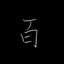

3 3


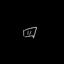

11 11


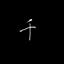

4 4


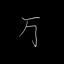

5 5


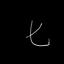

14 14


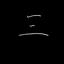

10 10


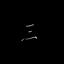

10 10


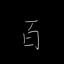

3 3


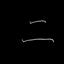

9 9


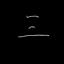

10 10


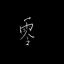

7 7


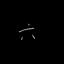

13 13


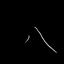

15 15


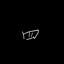

11 11


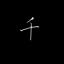

4 4


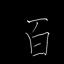

3 3


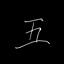

12 12


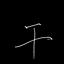

4 4


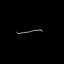

8 8


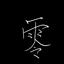

7 7


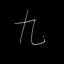

1 1


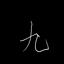

1 1


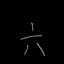

13 13


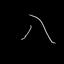

15 15


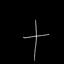

2 2


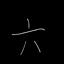

13 13


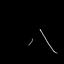

15 15


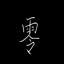

7 7


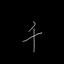

4 4


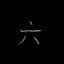

13 13


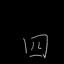

3 11


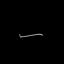

8 8


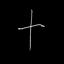

2 2


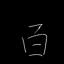

3 3


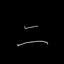

9 9


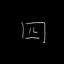

11 11


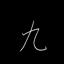

1 1


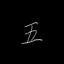

12 12


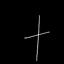

2 2


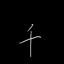

4 4


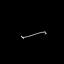

8 8


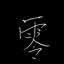

7 7


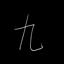

1 1


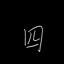

11 11


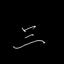

10 10


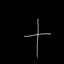

2 2


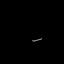

8 8


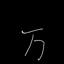

5 5


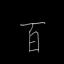

3 3


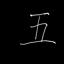

12 12


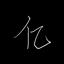

6 6


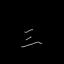

10 10


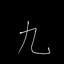

1 1


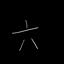

13 13


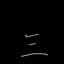

10 10


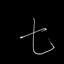

14 14


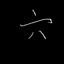

13 13


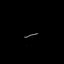

8 8


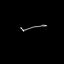

8 8


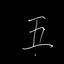

12 12


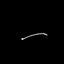

8 8


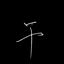

4 4


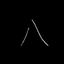

15 15


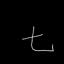

14 14


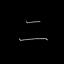

9 9


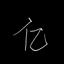

6 6


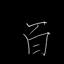

3 3


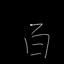

3 3


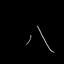

15 15


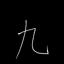

1 1


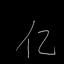

6 6


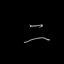

9 9


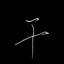

4 4


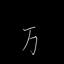

5 5


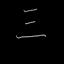

10 10


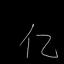

6 6


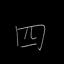

11 11


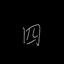

11 11


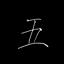

12 12


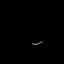

9 8


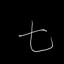

14 14


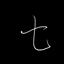

14 14


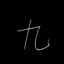

1 1


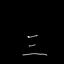

10 10


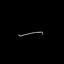

8 8


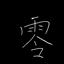

7 7


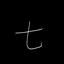

14 14


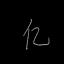

6 6


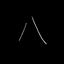

15 15


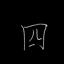

11 11


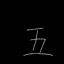

12 12


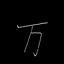

5 5


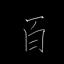

3 3


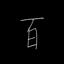

3 3


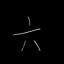

13 13


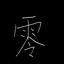

7 7


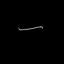

8 8


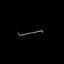

8 8


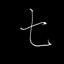

14 14


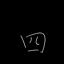

11 11


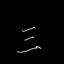

10 10


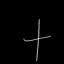

2 2


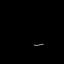

9 8


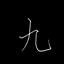

1 1


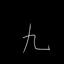

1 1


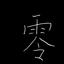

7 7


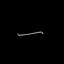

8 8


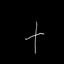

2 2


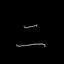

9 9


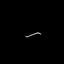

8 8


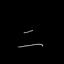

10 9


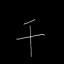

4 4


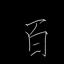

3 3


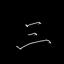

10 10


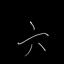

13 13


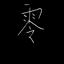

7 7


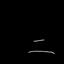

10 9


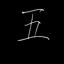

12 12


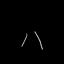

15 15


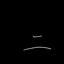

9 9


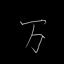

5 5


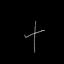

2 2


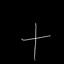

2 2


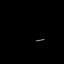

8 8


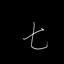

14 14


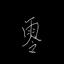

7 7


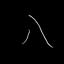

15 15


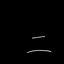

10 9


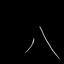

15 15


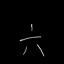

13 13


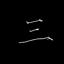

10 10


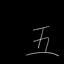

12 12


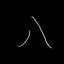

15 15


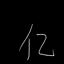

6 6


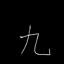

1 1


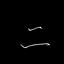

9 9


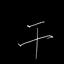

4 4


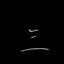

10 10


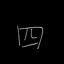

11 11


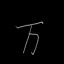

5 5


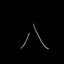

15 15


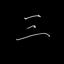

10 10


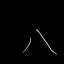

15 15


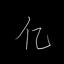

6 6


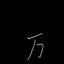

5 5


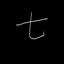

14 14


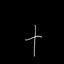

2 2


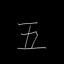

12 12


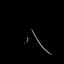

15 15


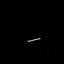

8 8


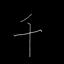

4 4


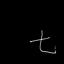

15 14


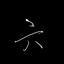

13 13


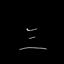

10 10


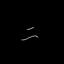

9 9


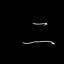

9 9


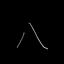

15 15


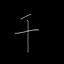

4 4


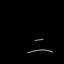

10 9


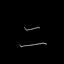

9 9


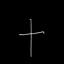

2 2


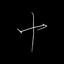

2 2


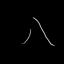

15 15


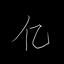

6 6


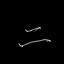

9 9


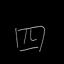

11 11


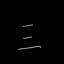

10 10


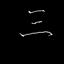

12 10


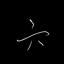

13 13


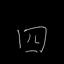

11 11


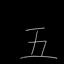

12 12


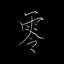

7 7


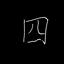

11 11


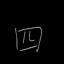

11 11


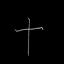

2 2


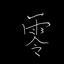

7 7


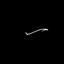

8 8


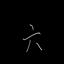

13 13


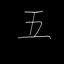

12 12


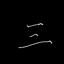

10 10


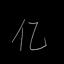

6 6


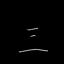

10 10


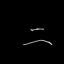

9 9


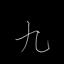

1 1


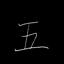

12 12


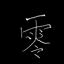

7 7


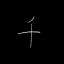

4 4


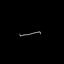

8 8


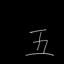

12 12


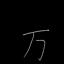

5 5


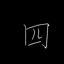

11 11


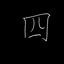

11 11


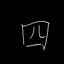

11 11


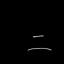

9 9


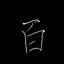

3 3


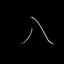

15 15


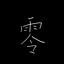

7 7


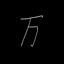

5 5


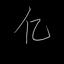

6 6


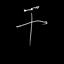

3 4


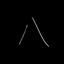

15 15


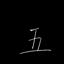

12 12


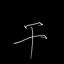

4 4


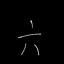

13 13


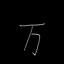

5 5


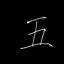

12 12


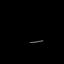

8 8


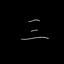

10 10


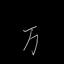

5 5


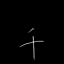

4 4


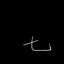

14 14


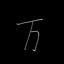

5 5


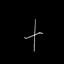

2 2


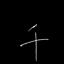

4 4


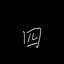

11 11


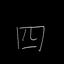

11 11


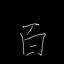

3 3


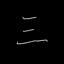

10 10


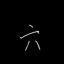

13 13


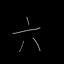

13 13


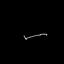

8 8


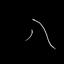

15 15


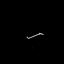

8 8


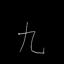

1 1


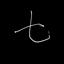

14 14


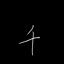

4 4


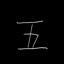

3 12


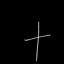

2 2


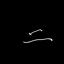

9 9


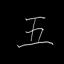

12 12


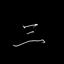

10 10


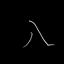

15 15


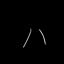

15 15


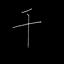

3 4


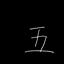

12 12


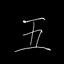

12 12


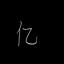

6 6


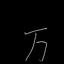

5 5


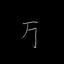

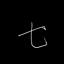

14 14


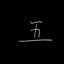

12 12


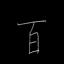

3 3


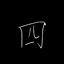

11 11


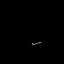

9 8


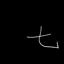

15 14


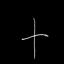

2 2


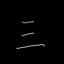

10 10


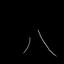

15 15


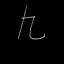

6 1


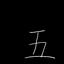

12 12


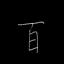

3 3


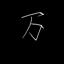

5 5


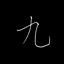

1 1


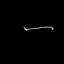

8 8


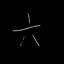

13 13


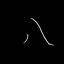

15 15


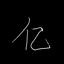

6 6


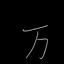

5 5


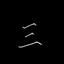

10 10


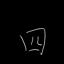

11 11


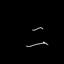

9 9


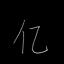

6 6


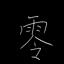

7 7


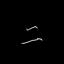

9 9


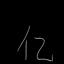

6 6


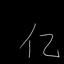

4 6


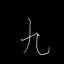

1 1


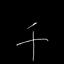

4 4


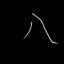

15 15


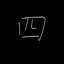

11 11


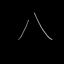

15 15


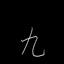

1 1


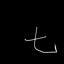

14 14


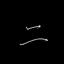

9 9


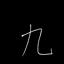

1 1


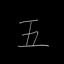

12 12


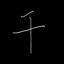

4 4


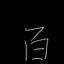

3 3


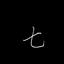

14 14


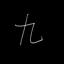

1 1


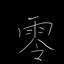

7 7


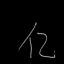

4 6


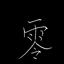

7 7


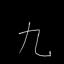

1 1


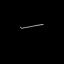

8 8


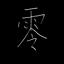

7 7


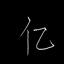

6 6


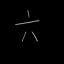

13 13


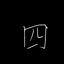

11 11


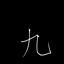

1 1


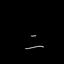

9 9


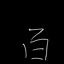

3 3


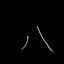

15 15


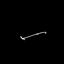

8 8


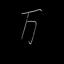

5 5


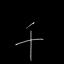

4 4


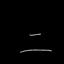

10 9


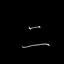

9 9


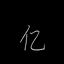

6 6


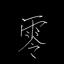

7 7


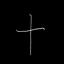

2 2


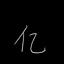

6 6


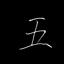

12 12


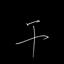

4 4


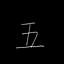

12 12


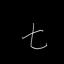

14 14


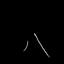

15 15


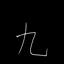

1 1


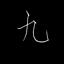

1 1


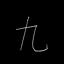

1 1


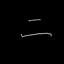

9 9


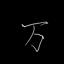

5 5


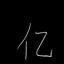

6 6


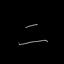

9 9


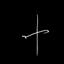

2 2


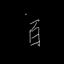

3 3


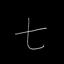

14 14


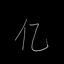

6 6


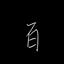

3 3


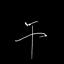

4 4


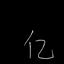

6 6


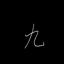

1 1


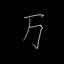

5 5


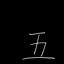

5 12


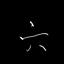

13 13


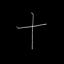

2 2


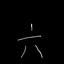

13 13


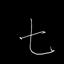

14 14


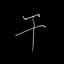

4 4


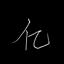

6 6


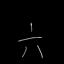

13 13


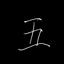

12 12


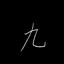

1 1


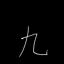

1 1


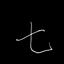

14 14


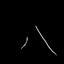

15 15


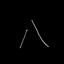

15 15


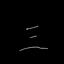

10 10


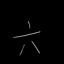

13 13


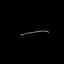

8 8


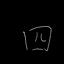

11 11


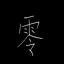

7 7


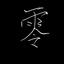

7 7


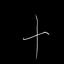

2 2


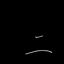

10 9


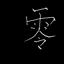

7 7


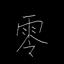

7 7


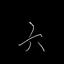

13 13


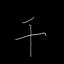

4 4


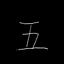

12 12


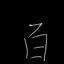

3 3


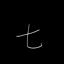

14 14


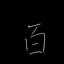

3 3


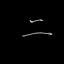

9 9


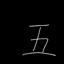

12 12


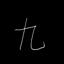

1 1


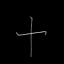

2 2


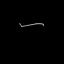

8 8


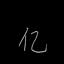

6 6


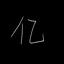

6 6


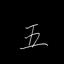

12 12


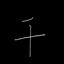

4 4


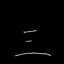

10 10


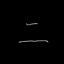

9 9


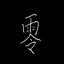

7 7


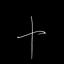

2 2


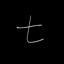

14 14


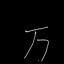

5 5


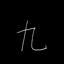

1 1


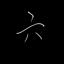

13 13


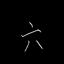

13 13


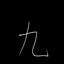

1 1


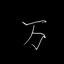

5 5


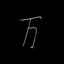

5 5


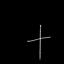

2 2


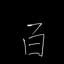

3 3


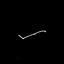

8 8


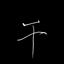

4 4


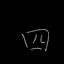

11 11


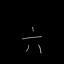

13 13


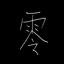

7 7


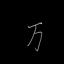

5 5


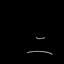

9 9


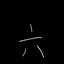

13 13


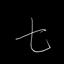

14 14


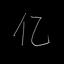

6 6


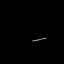

8 8


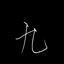

1 1


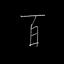

3 3


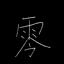

7 7


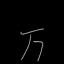

5 5


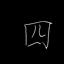

11 11


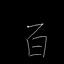

7 3


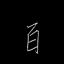

3 3


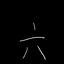

13 13


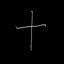

2 2


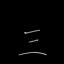

10 10


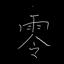

7 7


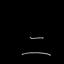

10 9


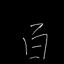

3 3


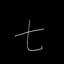

14 14


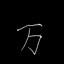

5 5


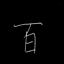

3 3


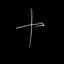

2 2


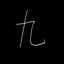

1 1


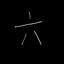

13 13


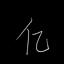

6 6


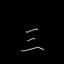

10 10


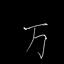

5 5


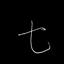

14 14


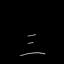

10 10


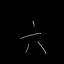

13 13


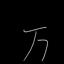

5 5


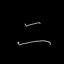

9 9


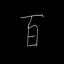

3 3


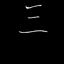

9 10


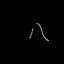

15 15


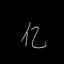

6 6


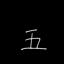

12 12


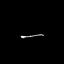

8 8


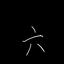

13 13


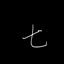

14 14


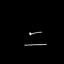

9 9


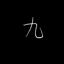

1 1


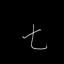

14 14


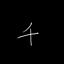

4 4


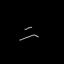

9 9


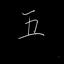

12 12


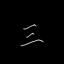

10 10


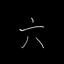

13 13


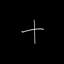

2 2


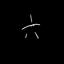

13 13


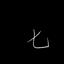

14 14


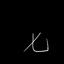

14 14


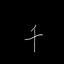

4 4


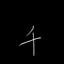

4 4


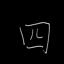

11 11


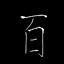

3 3


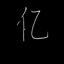

6 6


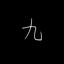

1 1


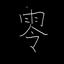

7 7


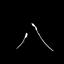

15 15


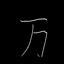

5 5


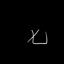

14 14


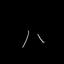

15 15


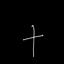

4 2


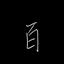

3 3


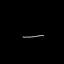

8 8


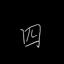

11 11


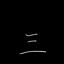

10 10


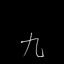

1 1


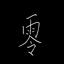

7 7


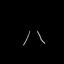

15 15


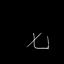

14 14


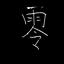

7 7


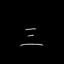

10 10


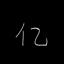

6 6


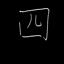

11 11


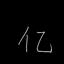

6 6


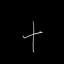

2 2


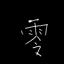

7 7


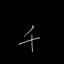

4 4


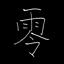

7 7


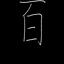

11 3


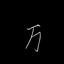

5 5


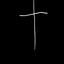

3 2


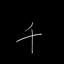

4 4


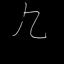

6 1


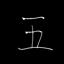

12 12


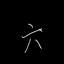

13 13


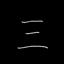

10 10


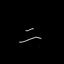

9 9


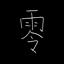

7 7


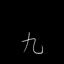

1 1


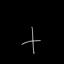

2 2


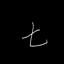

14 14


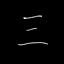

10 10


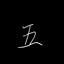

12 12


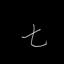

14 14


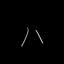

15 15


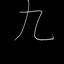

6 1


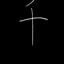

2 4


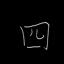

11 11


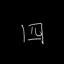

11 11


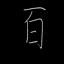

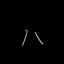

15 15


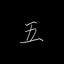

12 12


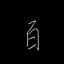

3 3


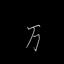

5 5


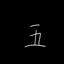

12 12


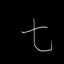

14 14


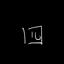

11 11


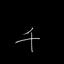

4 4


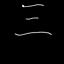

7 10


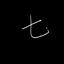

14 14


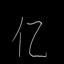

6 6


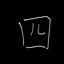

11 11


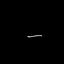

8 8


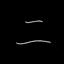

9 9


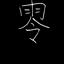

7 7


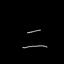

9 9


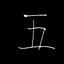

12 12


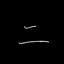

9 9


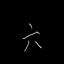

13 13


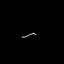

8 8


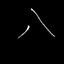

15 15


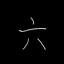

13 13


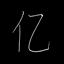

7 6


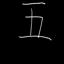

12 12


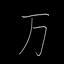

5 5


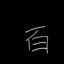

10 3


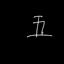

3 12


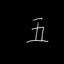

12 12


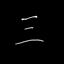

10 10


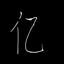

7 6


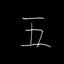

12 12


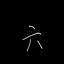

13 13


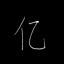

6 6


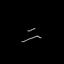

9 9


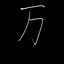

7 5


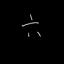

13 13


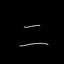

9 9


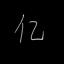

6 6


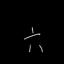

13 13


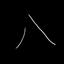

15 15


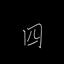

11 11


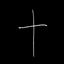

2 2


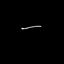

8 8


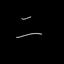

9 9


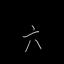

13 13


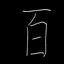

3 3


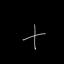

2 2


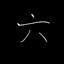

13 13


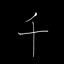

4 4


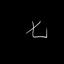

14 14


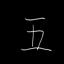

12 12


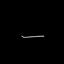

8 8


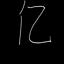

7 6


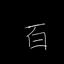

3 3


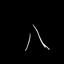

15 15


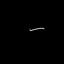

8 8


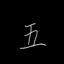

12 12


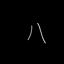

15 15


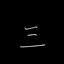

10 10


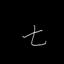

14 14


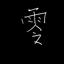

7 7


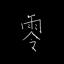

7 7


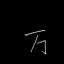

5 5


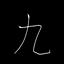

1 1


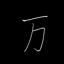

5 5


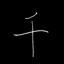

4 4


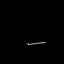

9 8


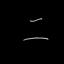

9 9


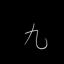

1 1


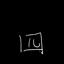

11 11


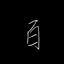

3 3


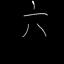

13 13


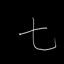

2 14


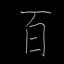

3 3


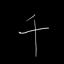

4 4


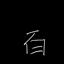

10 3


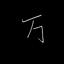

5 5


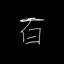

3 3


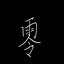

7 7


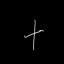

2 2


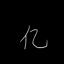

6 6


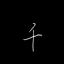

4 4


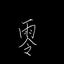

7 7


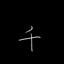

4 4


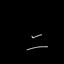

9 9


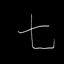

14 14


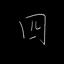

11 11


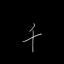

4 4


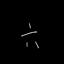

13 13


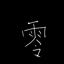

7 7


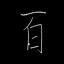

3 3


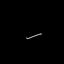

8 8


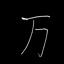

5 5


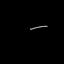

8 8


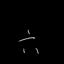

13 13


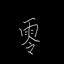

7 7


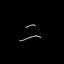

9 9


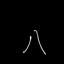

15 15


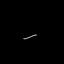

8 8


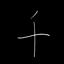

4 4


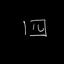

11 11


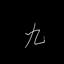

1 1


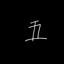

12 12


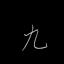

1 1


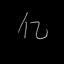

6 6


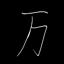

5 5


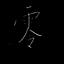

7 7


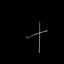

2 2


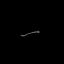

8 8


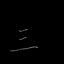

9 10


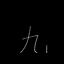

1 1


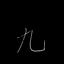

1 1


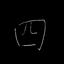

11 11


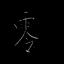

7 7


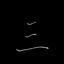

10 10


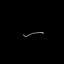

8 8


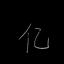

6 6


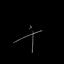

4 4


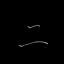

9 9


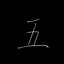

12 12


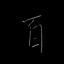

3 3


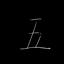

12 12


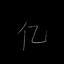

6 6


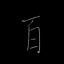

3 3


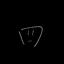

5 11


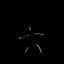

13 13


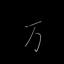

5 5


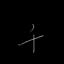

4 4


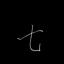

14 14


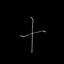

2 2


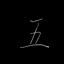

12 12


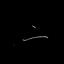

9 9


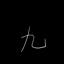

1 1


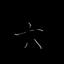

13 13


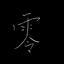

7 7


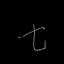

14 14


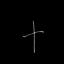

2 2


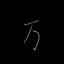

5 5


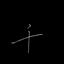

4 4


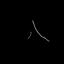

15 15


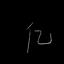

6 6


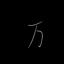

5 5


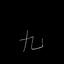

1 1


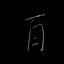

5 3


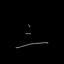

9 10


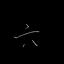

13 13


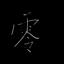

7 7


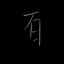

3 3


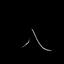

15 15


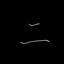

9 9


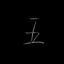

12 12


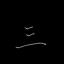

10 10


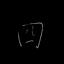

11 11


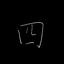

11 11


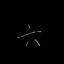

13 13


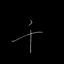

4 4


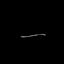

8 8


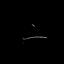

9 9


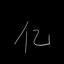

6 6


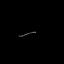

8 8


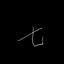

14 14


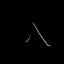

15 15


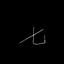

14 14


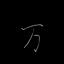

5 5


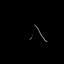

15 15


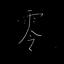

7 7


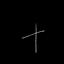

2 2


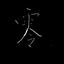

1 7


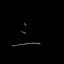

10 10


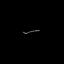

8 8


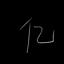

6 6


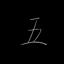

12 12


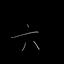

13 13


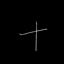

2 2


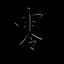

7 7


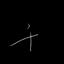

4 4


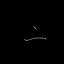

9 9


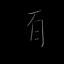

3 3


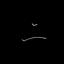

9 9


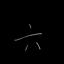

13 13


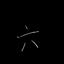

13 13


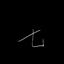

14 14


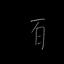

3 3


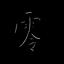

7 7


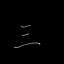

10 10


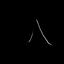

15 15


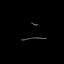

9 9


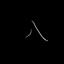

15 15


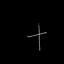

2 2


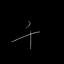

4 4


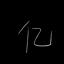

6 6


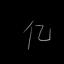

6 6


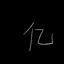

6 6


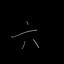

13 13


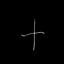

2 2


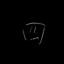

11 11


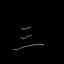

10 10


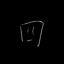

11 11


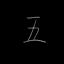

12 12


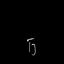

2 5


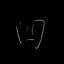

11 11


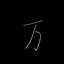

5 5


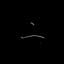

9 9


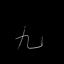

14 1


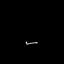

9 8


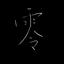

7 7


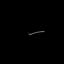

8 8


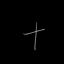

2 2


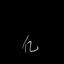

6 6


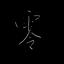

7 7


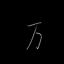

5 5


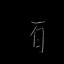

3 3


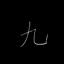

1 1


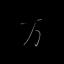

5 5


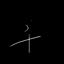

4 4


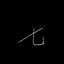

14 14


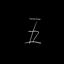

12 12


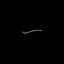

8 8


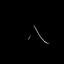

15 15


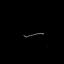

8 8


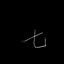

14 14


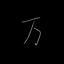

5 5


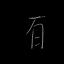

3 3


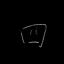

11 11


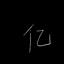

6 6


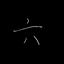

13 13


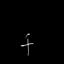

4 4


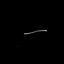

8 8


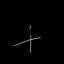

4 4


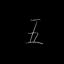

12 12


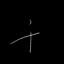

4 4


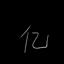

6 6


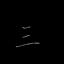

10 10


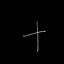

2 2


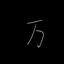

5 5


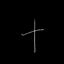

2 2


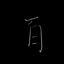

5 3


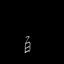

3 3


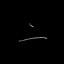

9 9


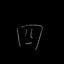

11 11


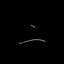

9 9


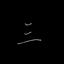

10 10


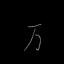

5 5


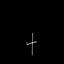

2 2


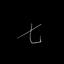

14 14


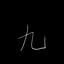

1 1


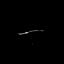

8 8


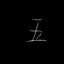

12 12


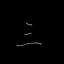

10 10


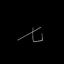

14 14
4 4


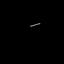

8 8


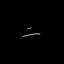

9 9


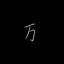

5 5


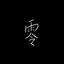

7 7


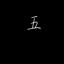

12 12


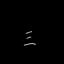

10 10


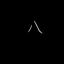

15 15


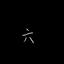

13 13


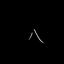

15 15


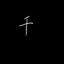

4 4


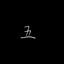

12 12


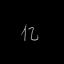

6 6


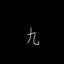

1 1


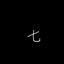

14 14


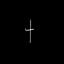

2 2


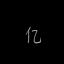

6 6


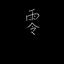

7 7


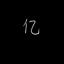

6 6


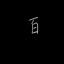

3 3


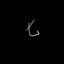

14 14


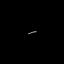

8 8


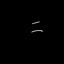

9 9


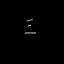

10 10


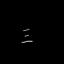

10 10


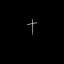

2 2


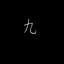

1 1


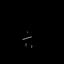

4 13


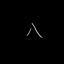

15 15


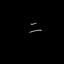

9 9


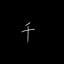

4 4


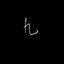

14 1


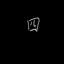

11 11


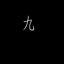

1 1


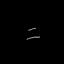

9 9


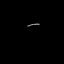

8 8


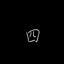

11 11


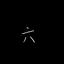

13 13


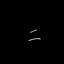

9 9


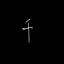

4 4


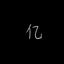

6 6


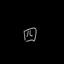

11 11


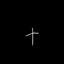

2 2


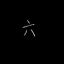

13 13


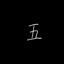

12 12


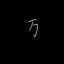

5 5


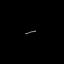

8 8


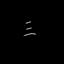

10 10


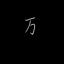

5 5


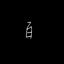

3 3


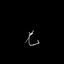

14 14


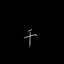

4 4


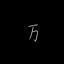

5 5


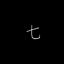

14 14


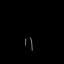

15 15


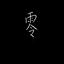

7 7


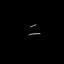

9 9


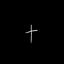

2 2


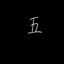

12 12


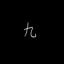

1 1


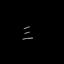

10 10


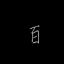

3 3


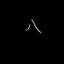

15 15


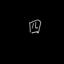

11 11


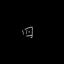

11 11


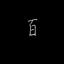

3 3


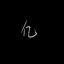

6 6


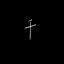

2 4


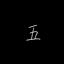

12 12


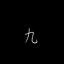

1 1


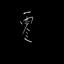

7 7


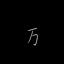

5 5


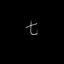

14 14


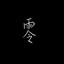

7 7


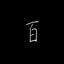

3 3


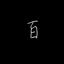

3 3


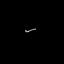

8 8


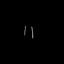

2 15


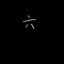

13 13


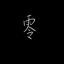

7 7


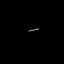

8 8


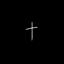

2 2


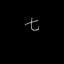

14 14


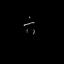

13 13


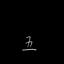

10 12


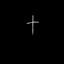

2 2


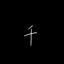

4 4


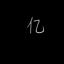

1 6


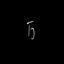

3 5


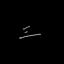

9 10


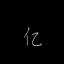

6 6


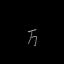

5 5


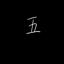

12 12


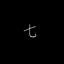

14 14


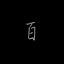

3 3


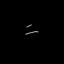

9 9


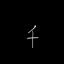

4 4


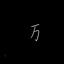

5 5


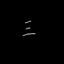

10 10


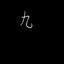

6 1


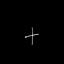

2 2


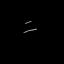

9 9


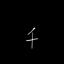

4 4


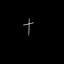

2 2


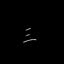

10 10


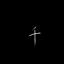

4 4


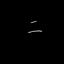

9 9


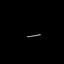

8 8


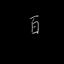

3 3


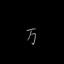

5 5


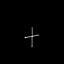

4 2


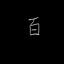

3 3


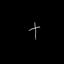

2 2


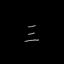

10 10


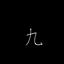

1 1


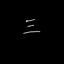

10 10


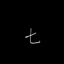

14 14


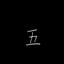

12 12


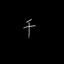

4 4


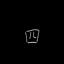

11 11


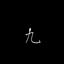

1 1


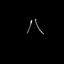

15 15


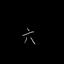

13 13


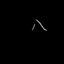

15 15


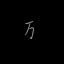

5 5


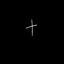

2 2


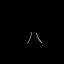

15 15


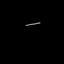

8 8


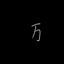

5 5


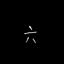

13 13


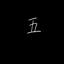

12 12


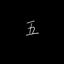

12 12


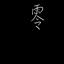

7 7


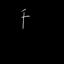

7 4


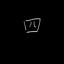

11 11


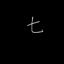

14 14


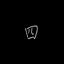

11 11


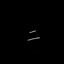

9 9


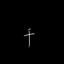

2 4


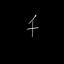

4 4


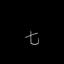

14 14


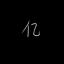

6 6


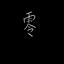

7 7


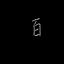

3 3


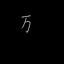

7 5


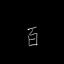

3 3


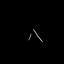

15 15


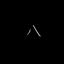

15 15


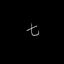

14 14


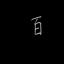

3 3


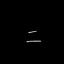

9 9


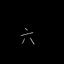

13 13


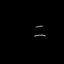

9 9


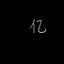

6 6


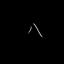

15 15


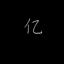

6 6


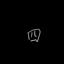

11 11


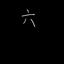

7 13


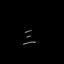

10 10


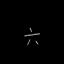

13 13


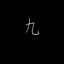

1 1


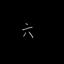

13 13


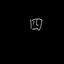

11 11


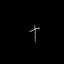

2 2


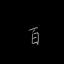

3 3


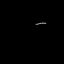

8 8


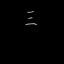

7 10


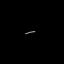

8 8


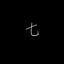

14 14


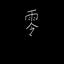

7 7


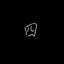

11 11


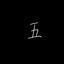

12 12


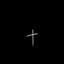

2 2


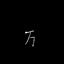

5 5


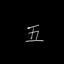

12 12


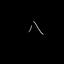

15 15


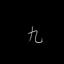

1 1


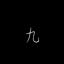

1 1


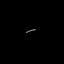

8 8


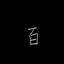

3 3


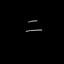

9 9


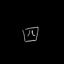

11 11


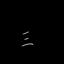

10 10


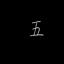

12 12


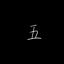

12 12


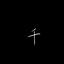

4 4


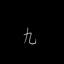

1 1


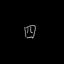

11 11


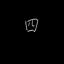

11 11


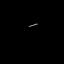

8 8


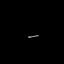

8 8


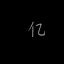

6 6


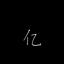

6 6


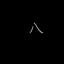

15 15


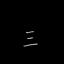

10 10


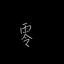

7 7


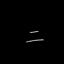

9 9


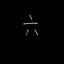

13 13


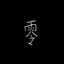

7 7


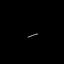

8 8


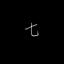

14 14


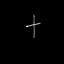

2 2


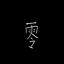

7 7


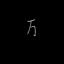

5 5


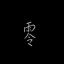

7 7


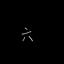

13 13


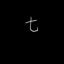

14 14


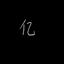

6 6


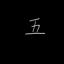

12 12


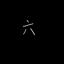

13 13


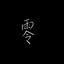

7 7


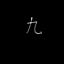

1 1


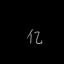

6 6


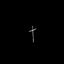

2 2


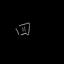

11 11


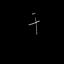

4 4


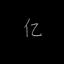

6 6


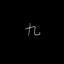

1 1


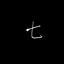

14 14


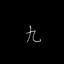

1 1


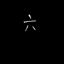

1 13


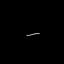

8 8


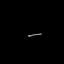

8 8


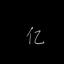

6 6


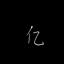

6 6


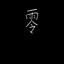

7 7


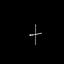

2 2


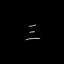

10 10


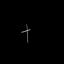

4 2


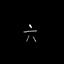

13 13


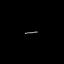

8 8


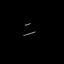

9 9


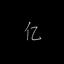

6 6


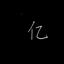

6 6


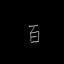

3 3


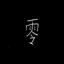

7 7


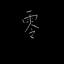

7 7


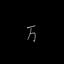

5 5


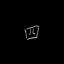

11 11


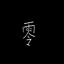

7 7


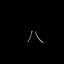

15 15


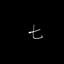

14 14


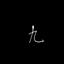

14 1


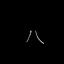

15 15


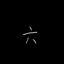

13 13


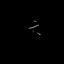

13 13


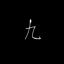

1 1


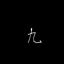

1 1


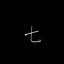

14 14


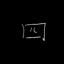

11 11


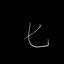

14 14


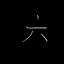

13 13


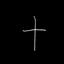

2 2


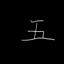

12 12


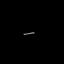

8 8


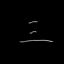

10 10
correct ones: 94.46%


In [ ]:
from google.colab.patches import cv2_imshow
correct = 0
for i in range(len(image_arr[-5000:, :, :, :])):
  cv2_imshow(image_arr[-5000:, :, :, :][i])
  print(np.argmax(predictions[i])+1, np.argmax(expected_output_array[-5000:, :][i])+1)
  if (np.argmax(predictions[i])+1 == np.argmax(expected_output_array[-5000:, :][i])+1):
    correct+=1

print(f"correct ones: {(correct/len(image_arr[-5000:, :, :, :]))*100}%")